# Ames Housing Price Prediction

## 1. Business Problem
There are over 80 features associated with a house which can possibly affect how much it is worth for. This means that there are as many areas which a real estate company should pay attention to when developing their projects. However, some features are naturally worth more as compared to others. By including these featuers, companies can expect a boost in their SalePrice. 

As a consultant in real estate company in City of Ames, my job is to uncover what are the top 25 features contributing to a high property saleprice and to what extend is each individual factor affecting the final SalePrice. In this way, my stakeholders can make the right decision both in investing and developing the right property to boost company revenue. 

## 2. Flow of This Analysis

Detailed data on computing assessed values for individual residential propoerties sold in Ames from 2006 to 2010 is made avaible for this project. There are 2051 observations and 81 variables of which 80 are features of a house and 1 is SalePrice (our target variable). This analysis will start with exploratory data analysis to observe the pattern relationship among features. The following section will detail the process and result of features selected for this analysis, after which we will build the correct model which minimizes errors in our prediction to prove feasibility of our model. Lastly, it will end with recommendations of top 30 features which real estate companies should look out for and how much impact each of them have on SalePrice of a house.

- [Exploratory Data Analysis](#3.-Exploratory-Data-Anlysis)
    - [Deal with Missing Values](3.1-Deal-with-Missing-Values)
    - [Distribution of Target Variable](#3.2-Distribution-of-Target-Variable)
    - [Feature Selection and Feature Engineering](#3.3-Feature-Selection-and-Feature-Engineering)
- [Round 2 Feature Selection](#4.-Round-2-Feature-Selection)
- [Data Modeling](#5.-Data-Modeling)
    - [Linear Regression](#5.1-Linear-Regression)
    - [LassoCV and Lasso](#5.2-LassoCV-and-Lasso)
    - [RidgeCV and Ridge](#5.3.-RidgeCV-and-Ridge)
- [Conclusion](#6.-Conclusion)

## 3. Exploratory Data Anlysis

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm
%matplotlib inline
pd.set_option('display.float_format', lambda x:'{:.3f}'.format(x))
pd.set_option('max_colwidth', 1000)
pd.set_option('max_rows', 90)
pd.set_option('max_columns', 90)

In [325]:
train = pd.read_csv('../01 Data/train.csv')

In [326]:
train.shape

(2051, 81)

In [327]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000,2051.000,2051.000,1721.000,2051.000,2051.000,2051.000,2051.000,2051.000,2029.000,2050.000,2050.000,2050.000,2050.000,2051.000,2051.000,2051.000,2051.000,2049.000,2049.000,2051.000,2051.000,2051.000,2051.000,2051.000,2051.000,1937.000,2050.000,2050.000,2051.000,2051.000,2051.000,2051.000,2051.000,2051.000,2051.000,2051.000,2051.000,2051.000
mean,1474.034,713590006.092,57.009,69.055,10065.208,6.112,5.562,1971.709,1984.190,99.696,442.300,47.959,567.728,1057.988,1164.488,329.329,5.513,1499.330,0.428,0.063,1.577,0.371,2.843,1.043,6.436,0.591,1978.708,1.777,473.672,93.834,47.557,22.572,2.591,16.511,2.398,51.574,6.220,2007.776,181469.702
std,843.981,188691837.885,42.824,23.261,6742.489,1.426,1.104,30.178,21.036,174.963,461.204,165.001,444.955,449.411,396.447,425.671,51.069,500.448,0.523,0.252,0.549,0.501,0.827,0.210,1.560,0.639,25.441,0.765,215.935,128.549,66.747,59.845,25.230,57.374,37.783,573.394,2.745,1.312,79258.659
min,1.000,526301100.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1895.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,12789.000
25%,753.500,528458140.000,20.000,58.000,7500.000,5.000,5.000,1953.500,1964.500,0.000,0.000,0.000,220.000,793.000,879.500,0.000,0.000,1129.000,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,319.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2007.000,129825.000
50%,1486.000,535453200.000,50.000,68.000,9430.000,6.000,5.000,1974.000,1993.000,0.000,368.000,0.000,474.500,994.500,1093.000,0.000,0.000,1444.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,27.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,162500.000
75%,2198.000,907180080.000,70.000,80.000,11513.500,7.000,6.000,2001.000,2004.000,161.000,733.750,0.000,811.000,1318.750,1405.000,692.500,0.000,1728.500,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,70.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,2930.000,924152030.000,190.000,313.000,159000.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,5095.000,1862.000,1064.000,5642.000,3.000,2.000,4.000,2.000,8.000,3.000,15.000,4.000,2207.000,5.000,1418.000,1424.000,547.000,432.000,508.000,490.000,800.000,17000.000,12.000,2010.000,611657.000


### 3.1 Deal with Missing Values

In [328]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

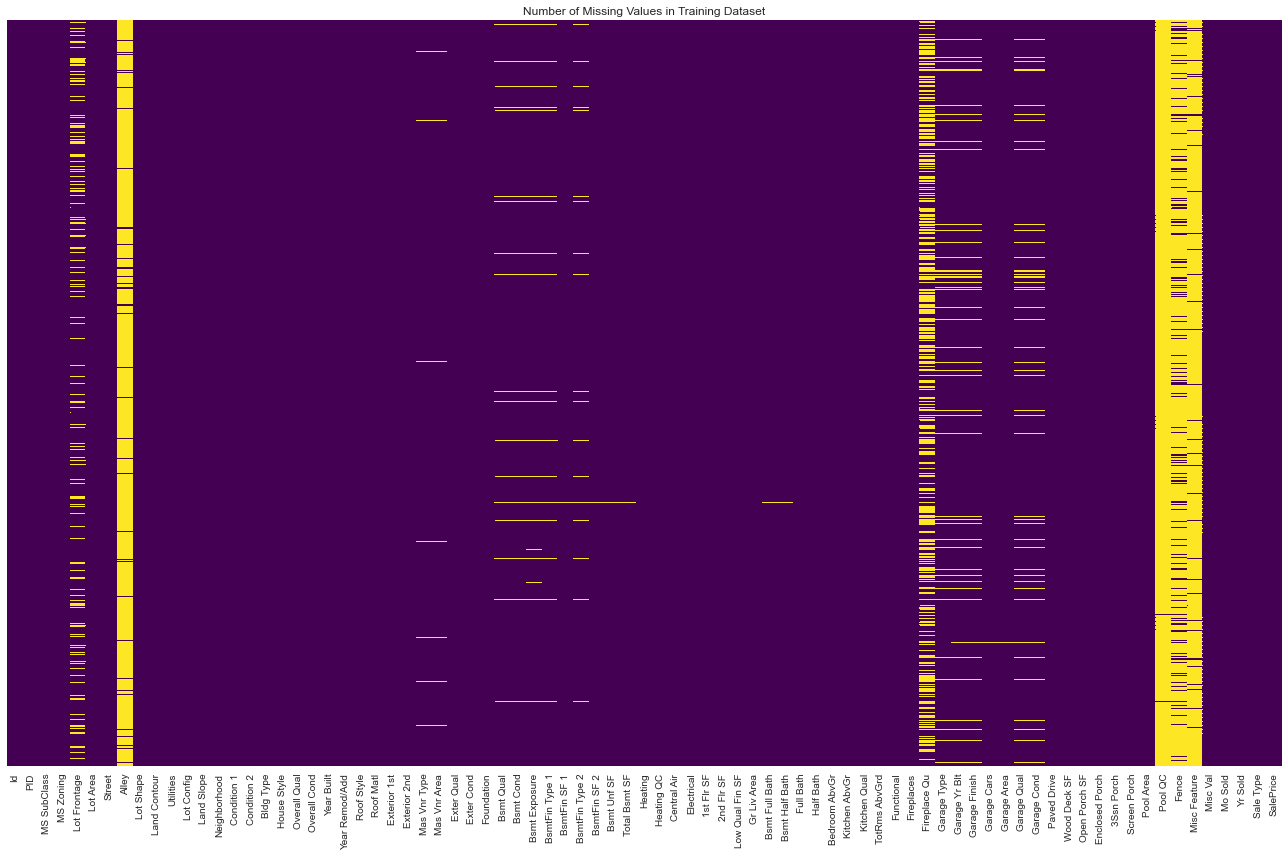

In [329]:
plt.figure(figsize=(18,12));
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')
plt.title('Number of Missing Values in Training Dataset');
plt.tight_layout()

>- There are too many missing values in 'Alley', 'Pool QC', 'Misc Feature', 'Fence', and 'Fireplace Quality' columns. Filling them up with predicted values will distort the dataset and affect out prediction accuracy. Therefore, we decide to drop them. <br>
>- Also notice that there are some columns having data missing at random and data not missing at random. Therefore, we want to account for these two types of missing pattern in different way. 

In [330]:
train.drop(columns=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'], inplace=True)

### 3.1.1 Missing at Random

In [331]:
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

### 3.1.2 Not Missing at Random

Some of the variables have missing values, this is simply because houses do have have those features. <br>

- Garage: There are 113 houses without garage. It is also noticed that there are 114 garages missing values for their attributes. This means that there is 1 in 114 houses has a garage, but missing attributes values. We will drop it in this analysis assuming it has the same pattern as rest of the houses with garage. 
- Basement: There are 55 houses without basement. For those which have, some of them do not have exposure to outside.
- Mas Veneer related: Some houses do have not Mas Veneer Area. 

Therefore, for these missing values, we will fill none. 

In [332]:
len(train[train['Garage Yr Blt'].isna()])

114

In [333]:
train[(train['Garage Yr Blt'].isna())&(-train['Garage Type'].isna())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.000,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.000,TA,TA,BrkTil,Gd,TA,No,ALQ,548.000,Unf,0.000,311.000,859.000,GasA,Ex,Y,SBrkr,942,886,0,1828,0.000,0.000,2,0,3,1,Gd,6,Typ,0,Detchd,nan,NaN,nan,nan,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [334]:
train.drop([1712], inplace=True)

In [335]:
train['Garage Yr Blt']=train['Garage Yr Blt'].fillna(0)
train['Garage Finish']=train['Garage Finish'].fillna('None')
train['Garage Qual']=train['Garage Qual'].fillna('None')
train['Garage Cond']=train['Garage Cond'].fillna('None')
train['Garage Type']=train['Garage Type'].fillna('None')

In [336]:
train['Bsmt Exposure']=train['Bsmt Exposure'].fillna('NoBsmt')
train['BsmtFin Type 2']=train['BsmtFin Type 2'].fillna('NoBsmt')
train['Bsmt Cond']=train['Bsmt Cond'].fillna('NoBsmt')
train['Bsmt Qual']=train['Bsmt Qual'].fillna('NoBsmt')
train['BsmtFin Type 1']=train['BsmtFin Type 1'].fillna('NoBsmt')
train['Mas Vnr Area']=train['Mas Vnr Area'].fillna(0)
train['Mas Vnr Type']=train['Mas Vnr Type'].fillna('None')

Finally drop the handful of missing values. 

In [337]:
missing = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum()>0].sum()

In [338]:
print(f'missing value percentage: {round(missing/len(train)*100, 2)}%')

missing value percentage: 0.54%


In [339]:
train.dropna(inplace=True)

### 3.2 Distribution of Target Variable

In [340]:
train['outlier'] = train['Gr Liv Area'].apply(lambda x: 0 if x<4000 else 1)

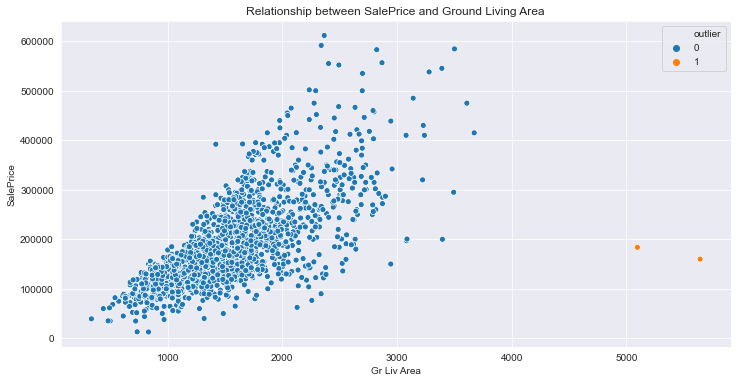

In [341]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train, hue='outlier');
plt.title('Relationship between SalePrice and Ground Living Area');

In [342]:
train = train[train['Gr Liv Area']<4000]

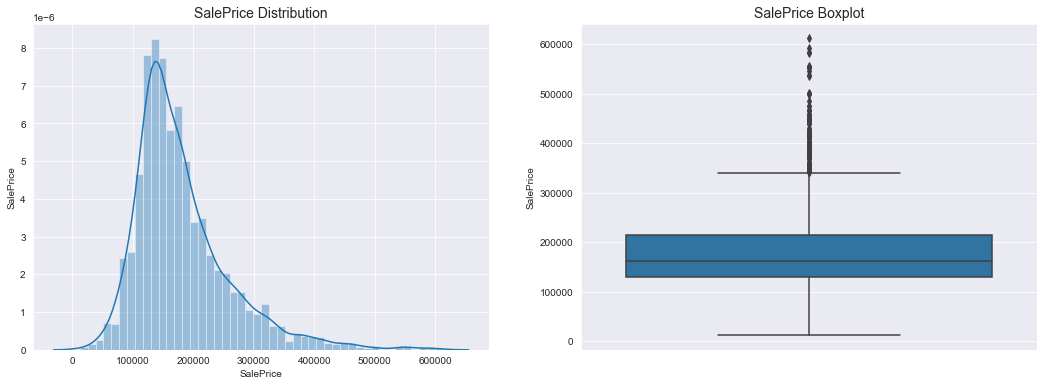

In [343]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.distplot(train['SalePrice'], ax=ax[0]);
sns.boxplot(y=train['SalePrice'], ax=ax[1]);
ax[0].set_title('SalePrice Distribution',fontsize=14)
ax[0].set_xlabel('SalePrice')
ax[0].set_ylabel('Count')
ax[1].set_title('SalePrice Boxplot',fontsize=14)
ax[0].set_ylabel('SalePrice')
plt.show()

> SalePrice has a left skewed distribution with mean around 180K. It is observed from the boxplot that there are some outliers that's possibly due to the presence of huge houses in this dataset. 

### 3.3 Feature Selection and Feature Engineering

For thorough analysis we will categorize variables into different types. 

In [344]:
train.select_dtypes(include=['int64']).columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice', 'outlier'],
      dtype='object')

In [345]:
train.select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [346]:
train.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [347]:
discrete_var = ['MS SubClass','Overall Qual','Overall Cond','Year Built','Year Remod/Add','Full Bath',
                'Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd', 'Fireplaces','Mo Sold',
                'Yr Sold', 'Bsmt Full Bath', 'Bsmt Half Bath']
continous_var = ['Lot Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Wood Deck SF',
                 'Open Porch SF','Enclosed Porch', '3Ssn Porch', 'Screen Porch','Pool Area','Misc Val',
                 'Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 
                 'Total Bsmt SF','Garage Yr Blt', 'Garage Cars', 'Garage Area']

In [348]:
cat_ord_var = ['Lot Shape','Utilities','Land Slope','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
               'BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional',
               'Garage Finish','Garage Qual','Garage Cond','Paved Drive']
cat_norm_var = ['MS Zoning','Street','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2',
               'Bldg Type', 'House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type',
               'Foundation','Heating','Central Air','Garage Type','Sale Type']

In [349]:
len(discrete_var)+len(continous_var)+len(cat_norm_var)+len(cat_ord_var)

73

In [350]:
len(train.columns)
# Id, PID and SalePrice not inside analysis. Outlier is the mask we created just now. 
# Therefore total of 4 variables not in included

77

#### 3.3.1 Discrete Variables

Discrete variables can be either categorical or numeric, we will separate them in this section. 

In [351]:
def box_count_plotter (var, threshold):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.boxplot(x=var, y='SalePrice', data=train, ax=ax[0])
    sns.countplot(x=var, data=train, ax=ax[1])
    ax[0].set_title('Boxplot of '+str(var))
    ax[1].set_title('Countplot of '+str(var))
    if threshold>0:
        ax[0].axhline(y=threshold, color='r', linestyle='--')
    plt.tight_layout()

Convert MS SubClass to nominal categorical variable. SubClasses with 25 percentile value above the threshold of will be classified as expensive, and the rest will be classified as cheap. 

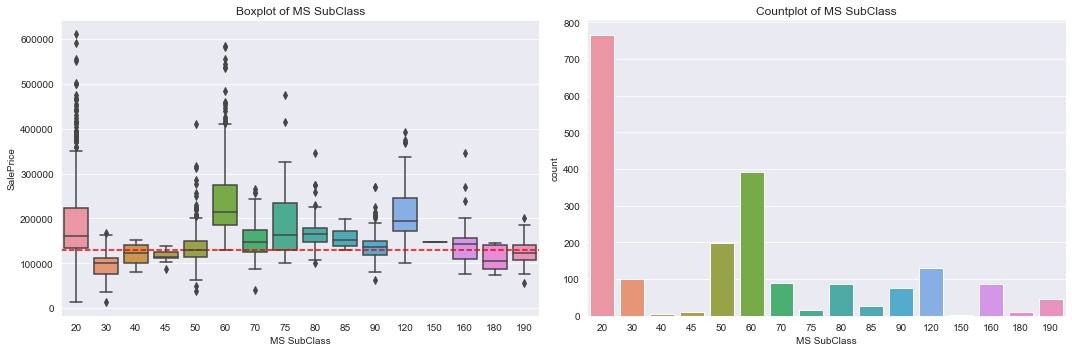

In [352]:
box_count_plotter('MS SubClass', 129825.0)

In [353]:
train['MS SubClass'] = train['MS SubClass'].apply(lambda x: 'expensive' if x in [20, 60, 70, 75, 80, 85, 120] else 'cheap')

In [354]:
cat_norm_var.append('MS SubClass')
discrete_var.remove('MS SubClass')

In [355]:
# Notice that MS SubClass contains information of house style
cat_norm_var.remove('House Style')

Notice that overall quality and overall condition can be combined to one interaction variable.

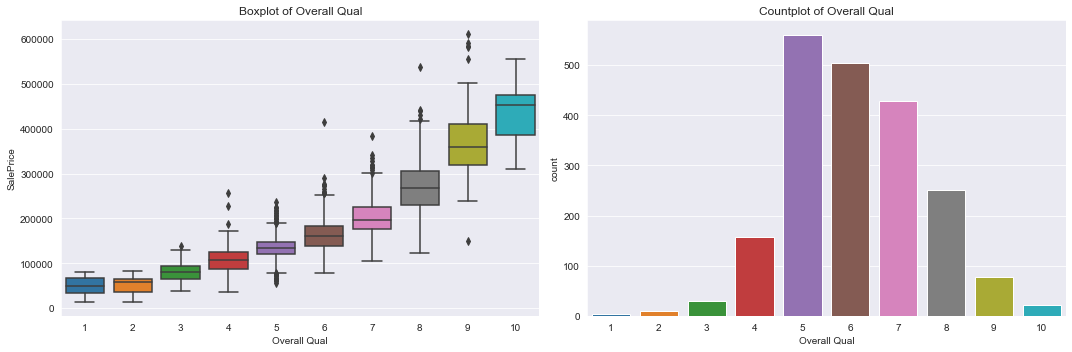

In [356]:
box_count_plotter('Overall Qual',0)

In [357]:
# every 100K difference in price is one grade difference in overall quality. Total 5 different grades. 
train['Overall Qual'] = train['Overall Qual'].map({1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:4, 10:5})

Houses with similar mean saleprice will be grouped together. 
- 1: overall cond 1&2
- 2: overall cond 3&4
- 3: overall cond 5
- 4: overall cond 6&7&8
- 5: overall cond 9

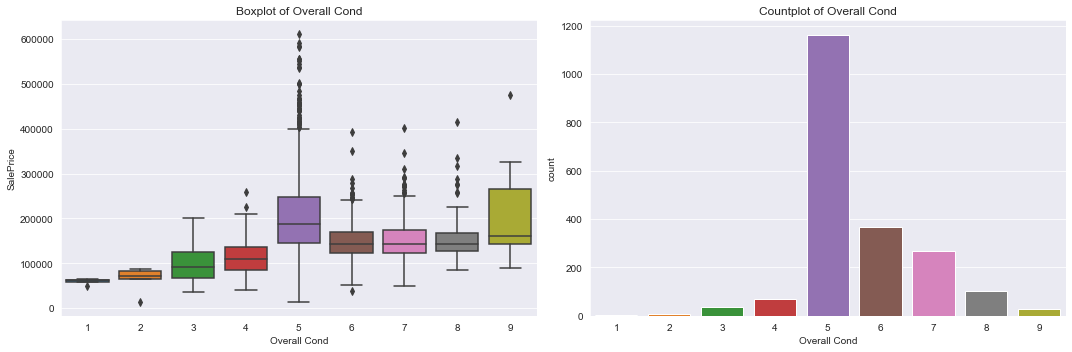

In [358]:
box_count_plotter('Overall Cond',0)

In [359]:
train['Overall Cond'] = train['Overall Cond'].map({1:1, 2:1, 3:2, 4:2, 5:3, 6:4, 7:4, 8:4, 9:5})

In [360]:
train['Overall Score'] = train['Overall Qual']*train['Overall Cond']

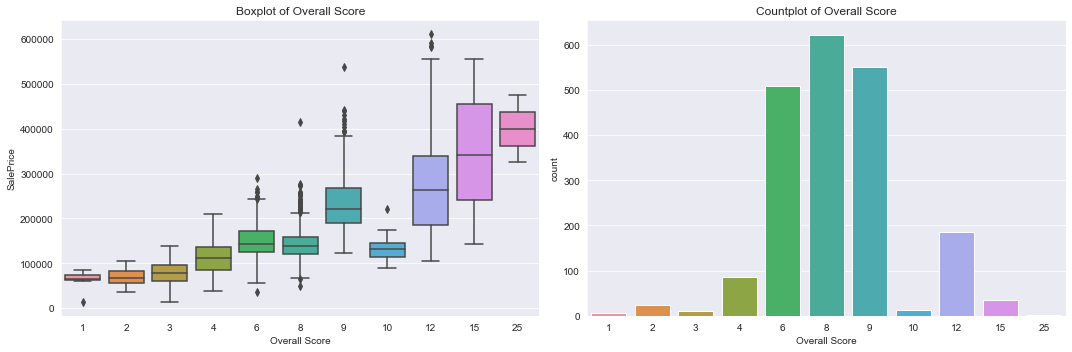

In [361]:
box_count_plotter('Overall Score',0)

In [362]:
discrete_var.append('Overall Score')
discrete_var.remove('Overall Qual')
discrete_var.remove('Overall Cond')

Year built and year remo do not tell us enough information. we will need to extract the useful piece from it.<br> We will convert this variable to house age instead. 

In [363]:
train['house_age'] = train['Yr Sold'] - train['Year Built']

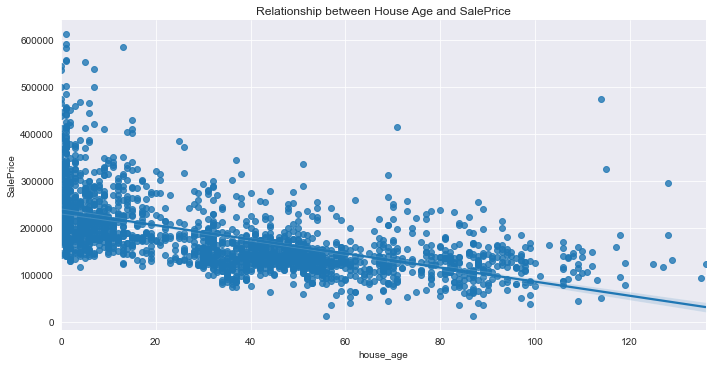

In [364]:
sns.lmplot(x='house_age', y='SalePrice', data=train, aspect=2);
plt.title('Relationship between House Age and SalePrice');

From above diagram, it is observed that the newer the house, the higher the saleprice and vice versa. 

In [365]:
discrete_var.append('house_age')
discrete_var.remove('Year Built')

In [366]:
train['house_remo_age'] = train['Yr Sold'] - train['Year Remod/Add']

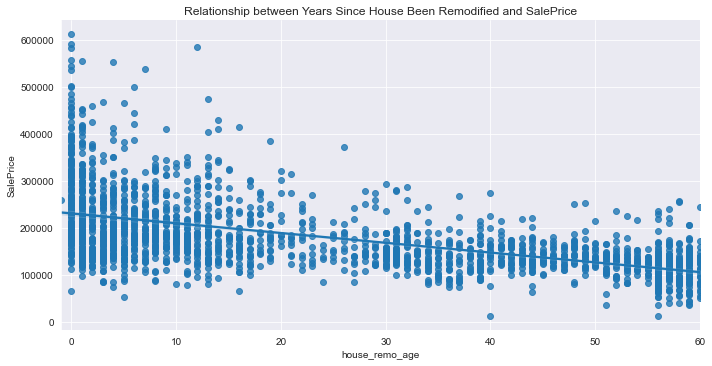

In [367]:
sns.lmplot(x='house_remo_age', y='SalePrice', data=train, aspect=2);
plt.title('Relationship between Years Since House Been Remodified and SalePrice');

In [368]:
train[train['house_remo_age']<0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,outlier,Overall Score,house_age,house_remo_age
1719,1703,528120010,expensive,RL,134.000,16659,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,3,3,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,PConc,Gd,TA,No,Unf,0.000,Unf,0.000,1582.000,1582.000,GasA,Ex,Y,SBrkr,1582,570,0,2152,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Detchd,2007.000,Unf,2.000,728.000,TA,TA,Y,0,368,0,0,0,0,0,6,2007,New,260116,0,9,0,-1


There are two houses with negative house age, that is because they are rebuilt/remodified after being sold in 2007. Therefore, for these two houses, we consider them as newly built with house age 0. 

In [369]:
train.loc[train['Id']==1703, 'house_remo_age']=0

In [370]:
train.loc[train['Id']==2181, 'house_age']=0

In [371]:
train.loc[train['Id']==2181, 'house_remo_age']=0

In [372]:
discrete_var.append('house_remo_age')
discrete_var.remove('Year Remod/Add')
discrete_var.remove('Yr Sold')

Group all bathroom related variables to have an interaction variable.

In [373]:
train['Total_Full_Baths'] = train['Full Bath']+train['Half Bath']+train['Bsmt Full Bath']+train['Bsmt Half Bath']

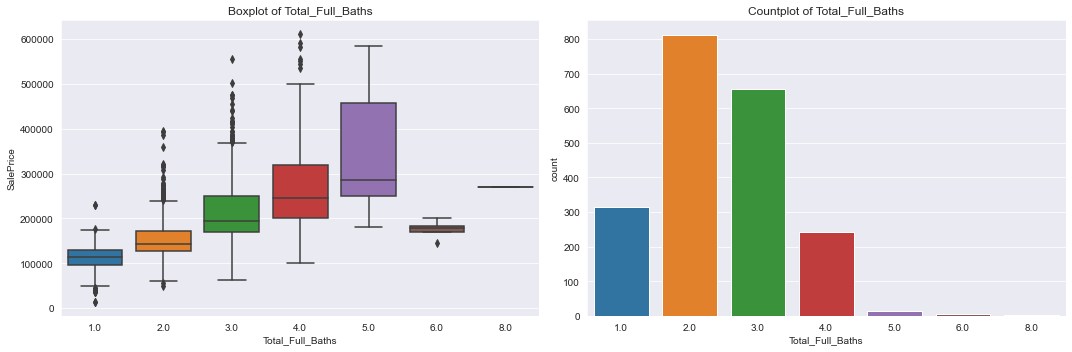

In [374]:
box_count_plotter('Total_Full_Baths',0)

In [375]:
discrete_var.append('Total_Full_Baths')
list1 = ['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath']
discrete_var = [var for var in discrete_var if var not in list1]
discrete_var

['Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Mo Sold',
 'Overall Score',
 'house_age',
 'house_remo_age',
 'Total_Full_Baths']

Notice that a lot of houses only have 1 kitchen above grade, therefore we drop this imbalanced column. 

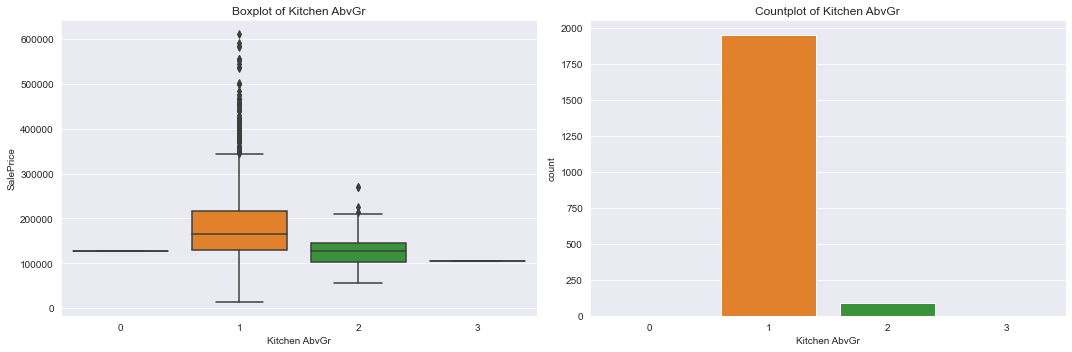

In [376]:
box_count_plotter('Kitchen AbvGr',0)

In [377]:
discrete_var.remove('Kitchen AbvGr')

Total rooms above grade and total bedrooms above grade:
- notice that total rooms above grade contains information of total bedrooms above grade. Therefore, we drop total rooms above grade feature. 

In [378]:
discrete_var.remove('Bedroom AbvGr')

Fireplaces:
- Notice that price variation is obvious between have a fireplace or not. 
- Therefore, we will group them as such: 0 for no fireplace, 1 for has fireplace.

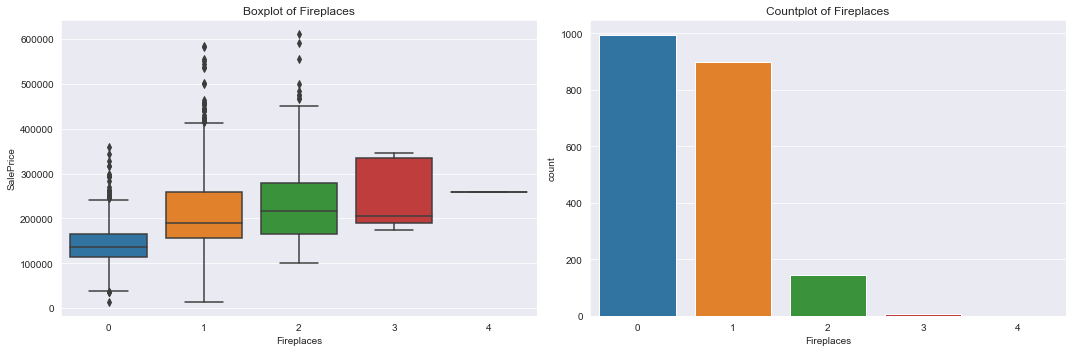

In [379]:
box_count_plotter('Fireplaces',0)

In [380]:
train['Fireplaces'] = train['Fireplaces'].map({0:0, 1:1, 2:1, 4:1, 3:1})

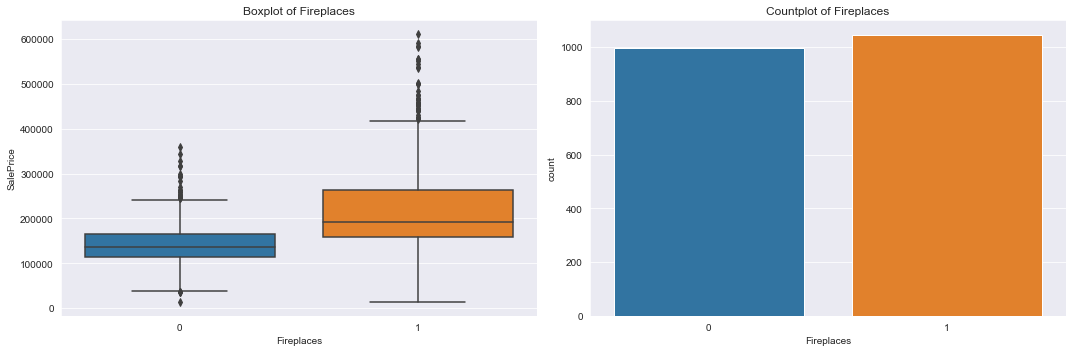

In [381]:
box_count_plotter('Fireplaces',0)

Month sold variable:
Notice that month sold does not really affect the price of house. Therefore, we won't consider this variable. 

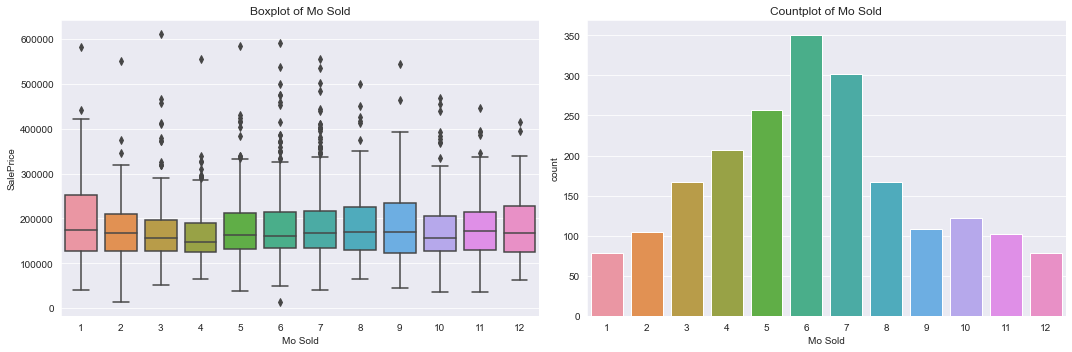

In [382]:
box_count_plotter('Mo Sold',0)

In [383]:
discrete_var.remove('Mo Sold')

Discrete features left:

In [384]:
discrete_var

['TotRms AbvGrd',
 'Fireplaces',
 'Overall Score',
 'house_age',
 'house_remo_age',
 'Total_Full_Baths']

>Findings from Discrete Variables:
- MS SubClass is actually very categorical. It is converted to two categorical variable with 2 categories, expensive and cheap.  
- Overall quality and overall condition are combined as one interactive variable. 
- Year built is converted to how old the house is. 
- Year remod is converted to how many years the house has been remodified. 
- Removed kitchen above grade feature, because majority of the houses only have 1 kitchen above grade.
- Bathroom related variables are groupped together to have an interaction variable. 
- Total number of bed rooms above grade is removed, as information is contained in total number of rooms above grade. 
- Number of fireplaces is converted to categorical variable having two categies: have or dont have fireplace.  
- Saleprice does not seem to vary among all the month sold. Therefore, remove this feature. 
- Number of discrete variable after first round of filtering is 6. 

#### 3.3.2 Continuous Variables

In [385]:
def scatterplotter (var):
    sns.jointplot(x=var, y='SalePrice', data=train, kind='reg');
    plt.title('Scatterplot of '+str(var))
    plt.tight_layout()

Lot Area:
- notice that there are two extreme outliers in the dataset. These two are the two huge houses selling at really cheap price. Therefore, we drop these points. 

In [386]:
train['huge house'] = train['Lot Area'].apply(lambda x: 0 if x<100000 else 1)

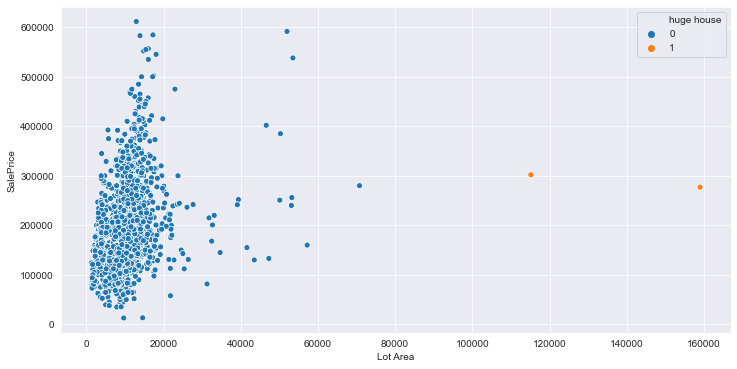

In [387]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Lot Area', y='SalePrice', data=train, hue='huge house');

In [388]:
train = train[train['Lot Area']<100000]

Area of different floors:
- notice that ground living area is the sum of 1st floor area, 2nd floor area and low quality finished area. 
- Therefore, to remove multi-colimearity, we will only keep ground living area feature. 

In [389]:
(train['Gr Liv Area']-train['1st Flr SF']-train['2nd Flr SF']-train['Low Qual Fin SF']).unique()

array([0])

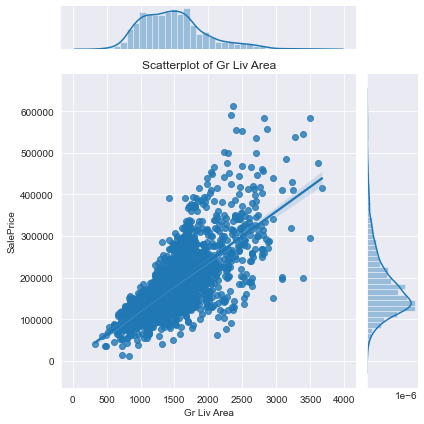

In [390]:
scatterplotter('Gr Liv Area')

In [391]:
remove_area = ['1st Flr SF','2nd Flr SF','Low Qual Fin SF']
continous_var = [var for var in continous_var if var not in remove_area]

Porch realated variables:

In [392]:
train['total_porch'] = train['Open Porch SF']+train['Enclosed Porch']+train['3Ssn Porch']+train['Screen Porch']

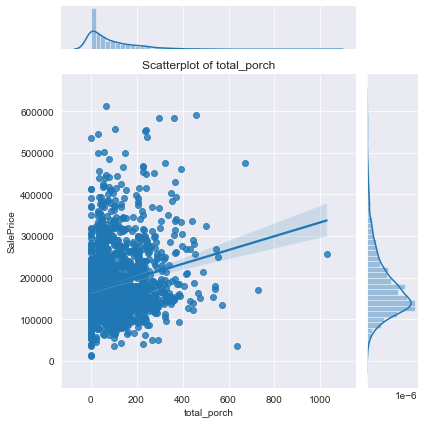

In [393]:
scatterplotter('total_porch')

In [394]:
continous_var.append('total_porch')
porch_var = ['Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']
continous_var = [var for var in continous_var if var not in porch_var]

Garage related variables:
- garage year built variable will remain as it is. There are some houses without a garage computing garage age by subtracting year built from year sold will mix up those newly built ones with houses without a garage since both will give 0 value. 
- garage cars has a strong linear correlationship with garage area.Therefore, we will only keep garage area. 
- garage area shows a strong linear correlationship with SalePrice

In [395]:
train.groupby('Garage Cars').mean()['Garage Area']

Garage Cars
0.000      0.000
1.000    295.161
2.000    519.426
3.000    804.080
4.000    941.385
5.000   1184.000
Name: Garage Area, dtype: float64

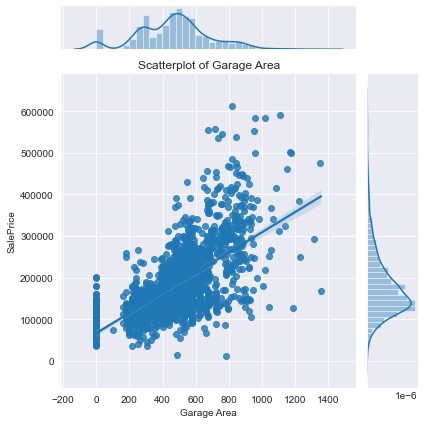

In [396]:
scatterplotter('Garage Area')

In [397]:
continous_var.remove('Garage Cars')

Basement related variables:
- Notice that total basement area contains is the sum of basement type 1 finished area, type2 finished area and unfinished area. Therefore, we will only keep total basement area. 
- Total basement sqft shows a strong linear corelationship with SalePrice, therefore, it is a suitable predicor. 

In [398]:
(train['Total Bsmt SF']-train['BsmtFin SF 1']-train['BsmtFin SF 2']-train['Bsmt Unf SF']).unique()

array([0.])

In [399]:
basmt_var = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF']
continous_var = [var for var in continous_var if var not in basmt_var]

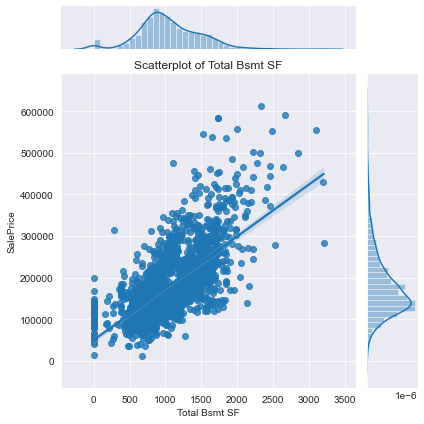

In [400]:
scatterplotter('Total Bsmt SF')

Other misc feature variables:

In [401]:
misc_var = ['Wood Deck SF','Pool Area','Misc Val','Lot Frontage', 'Mas Vnr Area']

/Users/katherine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/katherine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


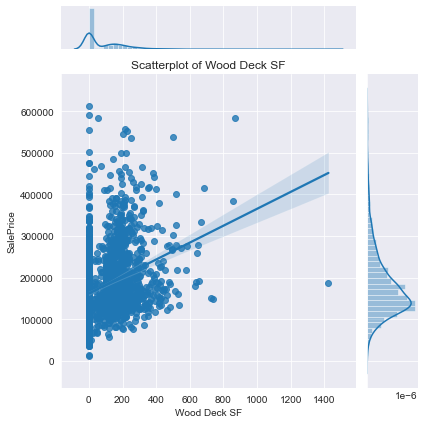

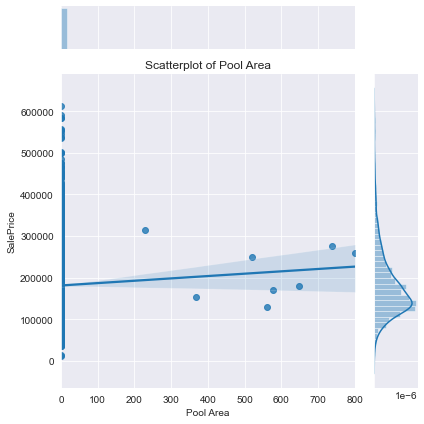

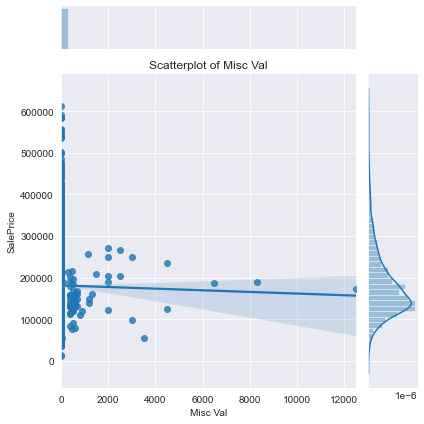

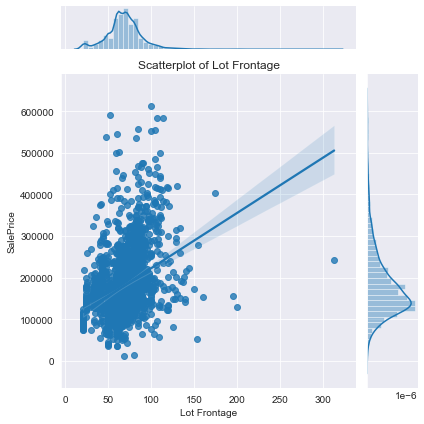

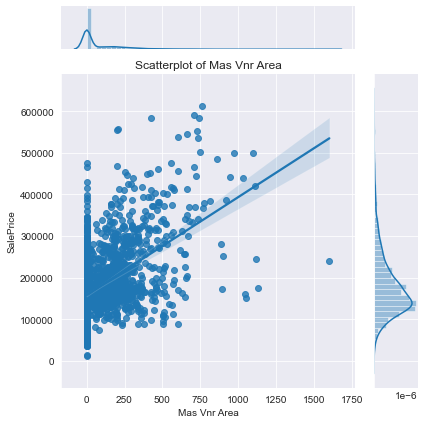

In [402]:
for var in misc_var:
    scatterplotter(var)

In [403]:
misc_var_remove = ['Pool Area', 'Misc Val']
continous_var = [var for var in continous_var if var not in misc_var_remove]

Notice that both pool area and misc val do not have linear relationship with SalePrice, therefore, we will drop them. 

In [404]:
continous_var

['Lot Area',
 'Gr Liv Area',
 'Wood Deck SF',
 'Lot Frontage',
 'Mas Vnr Area',
 'Total Bsmt SF',
 'Garage Yr Blt',
 'Garage Area',
 'total_porch']

In [405]:
len(continous_var)

9

>Findings from Continuous Variable:
- Lot Area outliers are removed. 
- 1st floor sqft, 2nd floor sqft and low quality sqft are removed since they sum up to total ground living area. 
- Ground living area seem to have a strong linear relationship with SalePrice.
- Porch related variables are combined to form an interactive variable - total porch area. 
- Garage year built is remained without modification. 
- Garage cars is removed as it has a strong linear relationship with garage area. 
- basement area variables are removed except total basement area as the rest of them sum up to be total basement area. 
- Pool area and misc val variables are removed as they do not have linear relationship with SalePrice either. 
- total continuous varaible left after first round of filtering is 9. 

#### 3.3.3 Categorical Variables (Ordinal)

In this section, categorical values with 80% or more of its members falling in one of its category will be removed from consideration. 

In [406]:
dictionary1 = {}
for var in cat_ord_var:
    dictionary1[var] = list(train[var].unique())

In [407]:
bias_list = []
for var in cat_ord_var:
    cat = train[var].value_counts().index[0]
    bias = train[train[var]==cat][var].count()/len(train)
    if bias>0.8:
        bias_list.append(var)
bias_list

['Utilities',
 'Land Slope',
 'Exter Cond',
 'Bsmt Cond',
 'BsmtFin Type 2',
 'Electrical',
 'Functional',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive']

In [408]:
cat_ord_var = [var for var in cat_ord_var if var not in bias_list]

In [409]:
cat_ord_var

['Lot Shape',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Kitchen Qual',
 'Garage Finish']

Notice that the distribution of lot shape is rather imbalanced. Therefore, we will classify them to only two types. Regular and irregular. 

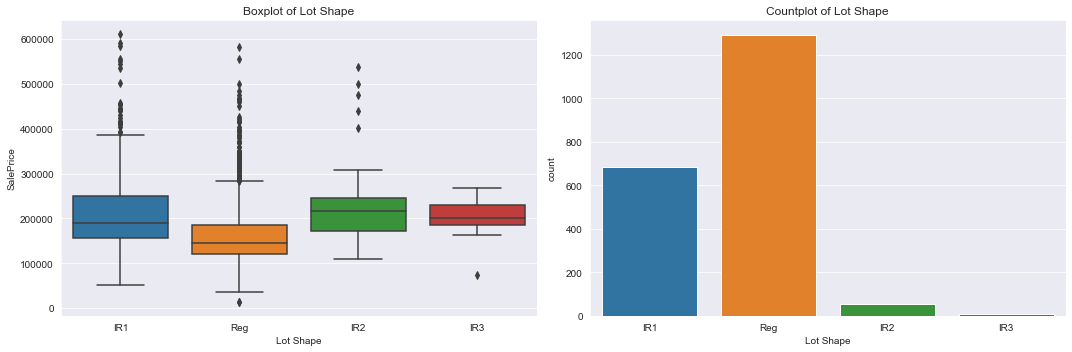

In [410]:
box_count_plotter('Lot Shape',0)

In [411]:
train['Lot Shape'] = train['Lot Shape'].map({'Reg':'Reg', 'IR1':'IR', 'IR2':'IR', 'IR3':'IR'})

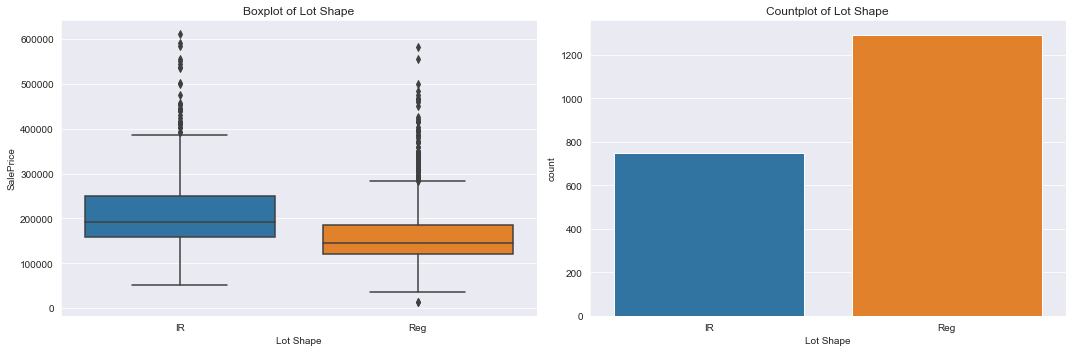

In [412]:
box_count_plotter('Lot Shape',0)

Exterior quality is observed to have strong linear correlationship with SalePrice and there is enough varaince in SalePrice to be a good predictor.

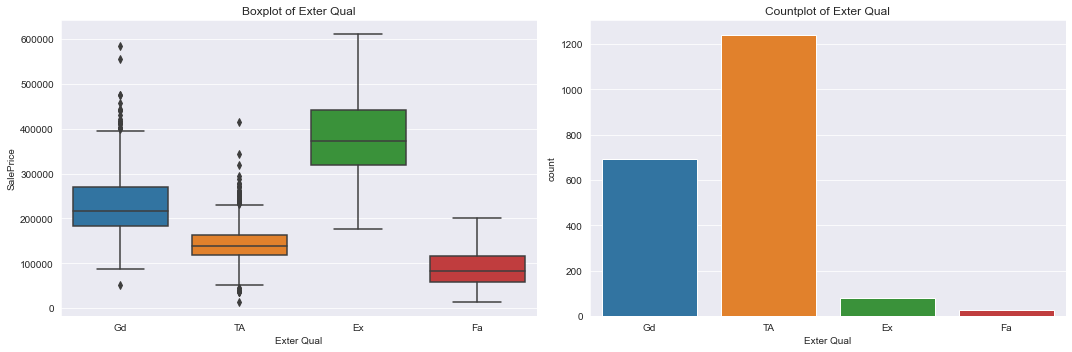

In [413]:
box_count_plotter('Exter Qual',0)

Basement related variables:
- it is observed that combining basement quality and basement exposure to be one interaction variable does not make sense, because average saleprice for score 3 and 4 is lower than that of score 2.5. This might be due to the reason that either basement quality or basement expoure has a higher influence on SalePrice. Therefore, we will leave these two variables as they are and do not combine them so that we can see the impact from each variable. 

In [414]:
dictionary1['Bsmt Qual']

['TA', 'Gd', 'Fa', 'NoBsmt', 'Ex', 'Po']

In [415]:
dictionary1['Bsmt Exposure']

['No', 'Gd', 'Av', 'NoBsmt', 'Mn']

In [416]:
train['Bsmt Qual'] = train['Bsmt Qual'].map({'TA':3, 'Gd':4, 'Ex':5, 'Fa':2, 'Po':1, 'NoBsmt':0})

In [417]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].map({'Av':3, 'Gd':4, 'Mn':2, 'No':1, 'NoBsmt':0})

In [418]:
train['Total Bsmt Score'] = (train['Bsmt Qual']*train['Bsmt Exposure'])*0.5

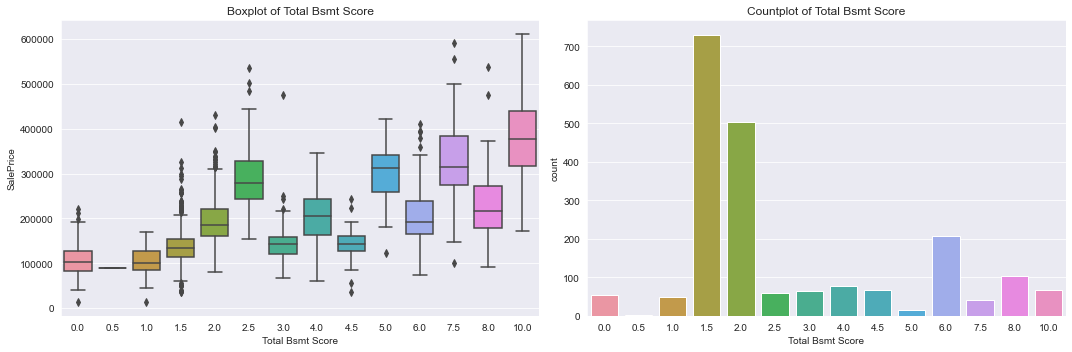

In [419]:
box_count_plotter('Total Bsmt Score',0)

convert basement quality and basement exposure to their original form

In [420]:
train['Bsmt Qual'] = train['Bsmt Qual'].map({3:'TA', 4:'Gd', 5:'Ex', 2:'Fa', 1:'Po', 0:'NoBsmt'})
train['Bsmt Exposure'] = train['Bsmt Exposure'].map({3:'Av', 4:'Gd', 2:'Mn', 1:'No', 0:'NoBsmt'})

For basement finished types variables:
- There are some price variations among groups, we will keep this feature in our analysis. 

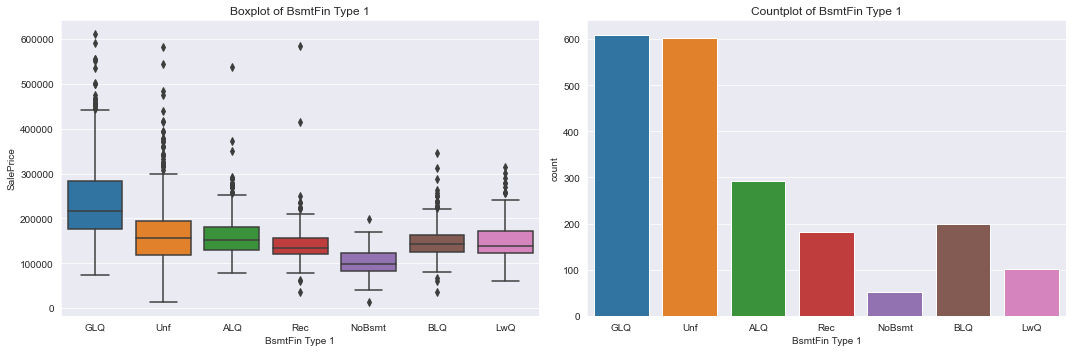

In [421]:
box_count_plotter('BsmtFin Type 1',0)

Garage related features:
- There are enough price variation in different types of garage finish. Therefore, we will keep this as one of our predictors. 

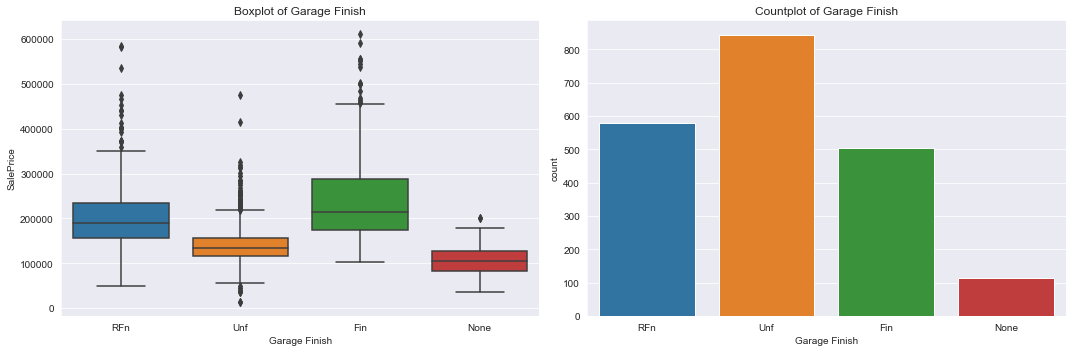

In [422]:
box_count_plotter('Garage Finish',0)

Ordinal category variables left:

In [423]:
cat_ord_var

['Lot Shape',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Kitchen Qual',
 'Garage Finish']

> Changes in this section:
- Lot Shape is simplified to be either regular or not
- Exterior related variables are combined to be one interaction variable - total exterior score
- basement related variables are combined to be one interaction variable - total basement score
- Variables with more than 80% of its member located in one category only are dropped:
    - Utilities, Land Slope,Electrical,Functional,Garage Qual,Garage Cond,Paved Drive,
- Heating quality, kitchen quality and garage finish are converted to numerical form. 
- Number of ordinal categorical variables left is 6

#### 3.3.4 Categorical Variables (Norminal)

Same as all the sections above, variables with 80% or more of its members in one category will be dropped. 

In [424]:
norm_dict = {}
for var in cat_norm_var:
    norm_dict[var] = list(train[var].unique())

In [425]:
bias_list = []
for var in cat_norm_var:
    cat = train[var].value_counts().index[0]
    bias = train[train[var]==cat][var].count()/len(train)
    if bias>0.8:
        bias_list.append(var)
bias_list

['Street',
 'Land Contour',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'Roof Matl',
 'Heating',
 'Central Air',
 'Sale Type']

In [426]:
cat_norm_var = [var for var in cat_norm_var if var not in bias_list]

In [427]:
cat_norm_var

['MS Zoning',
 'Lot Config',
 'Neighborhood',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Garage Type',
 'MS SubClass']

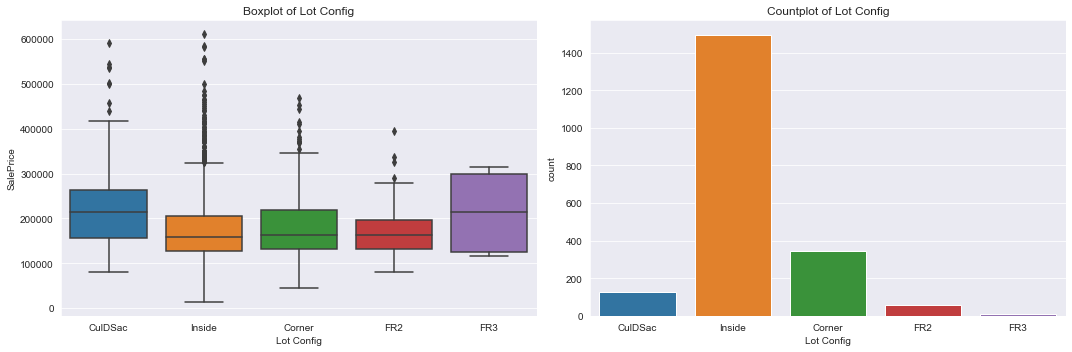

In [428]:
box_count_plotter('Lot Config',0)

In [429]:
norm_dict['Lot Config']

['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3']

In [430]:
# remap this to simplify
# culdsac = culdsac, inside=inside, corner=corner, fr2&fr3=fr
train['Lot Config'] = train['Lot Config'].map({'CulDSac':'CulDSac', 'Inside':'Inside', 
                                               'Corner':'Corner', 'FR2':'FR', 'FR3':'FR'})

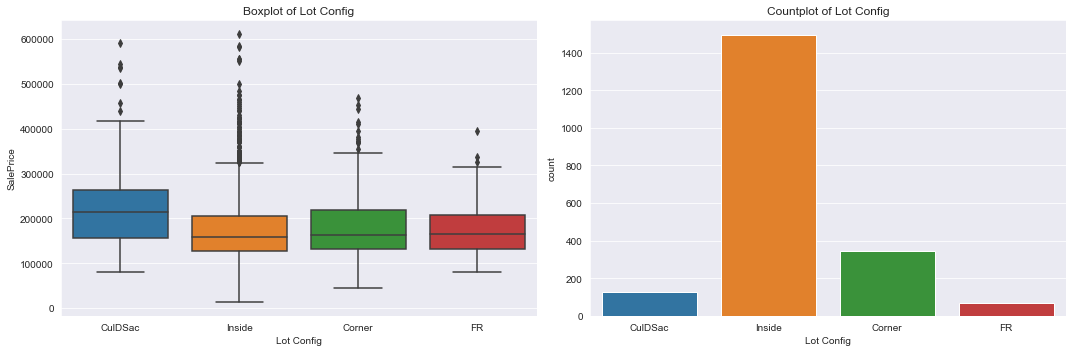

In [431]:
box_count_plotter('Lot Config',0)

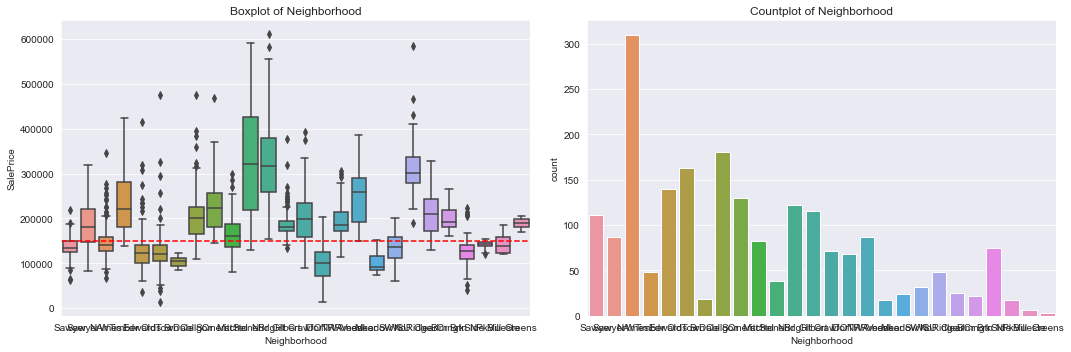

In [432]:
box_count_plotter('Neighborhood', 150000.0)

In [433]:
# Threshold of 150000 (25 percentile of SawyerW category price) is set to separete these categories into 2 simplified category.
# Categories with their 25 percentile line lies below the threshold will be group elite and rest are group normal
# 1 for elite, 0 for normal. 
train['Neighborhood'] = train['Neighborhood'].map({'Sawyer':'normal','SawyerW':'elite','NAmes':'normal',
                                                   'Timber':'elite','Edwards':'normal','OldTown':'normal',
                                                   'BrDale':'normal','CollgCr':'elite','Somerst':'elite',
                                                   'Mitchel':'normal', 'StoneBr':'elite','NridgHt':'elite',
                                                   'Gilbert':'elite','Crawfor':'elite','IDOTRR':'normal', 
                                                   'NWAmes':'elite','Veenker':'elite','MeadowV':'normal',
                                                   'SWISU':'normal','NoRidge':'elite','ClearCr':'elite',
                                                   'Blmngtn':'elite','BrkSide':'normal','NPkVill':'normal',
                                                   'Blueste':'normal','Greens':'elite'})

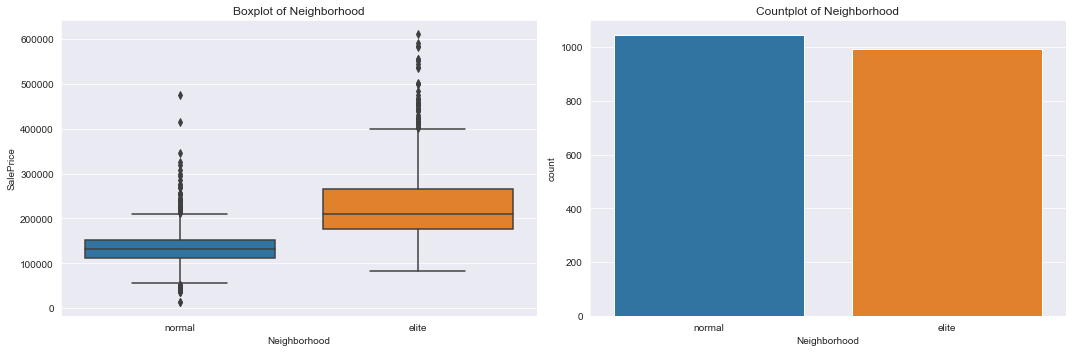

In [434]:
box_count_plotter('Neighborhood', 0)

Exterior types covering the house
- A house can have multiple exterior types covering the house and different types cost differently in price. 
- We do not observe the same pricing trend in exterior 1st type and exterior 2nd type. For example, houses with CementBoard in first graph are selling at much higher price than that in second graph. This difference might be due to the fact that some houses have more area of cementboard than others leading to the difference in price. However, since we do not have information on specific area of each exterior type, we cannot tell the relationsip between exterior type and price. Therefore, we will drop these two features. 

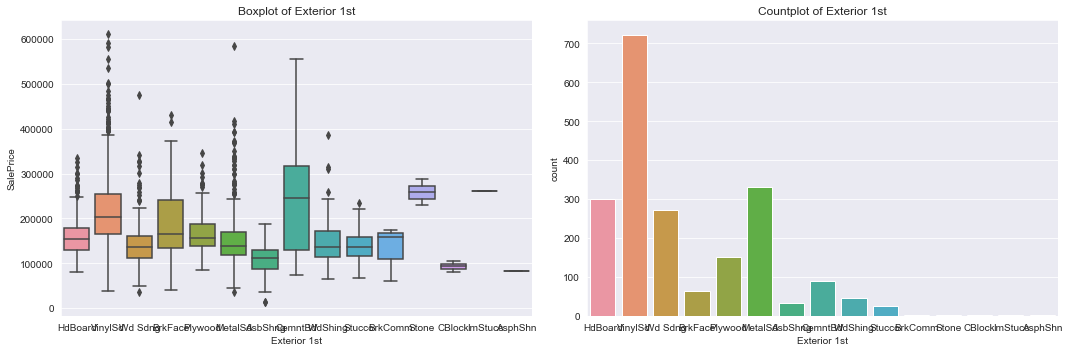

In [435]:
box_count_plotter('Exterior 1st',0)

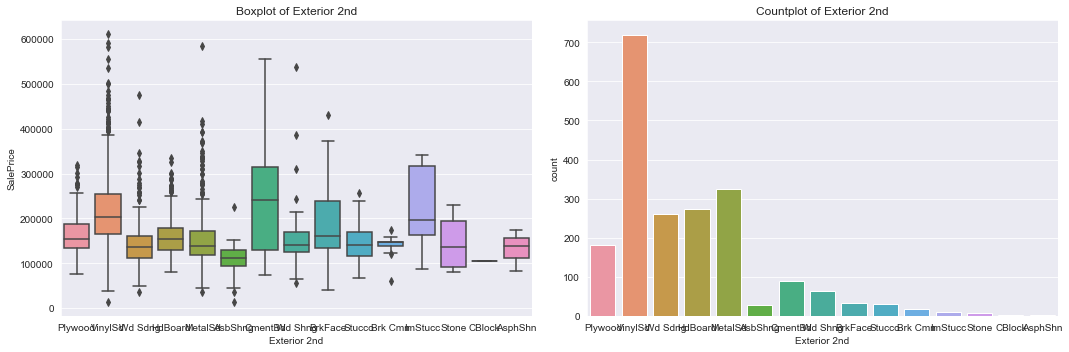

In [436]:
box_count_plotter('Exterior 2nd',0)

In [437]:
cat_norm_var.remove('Exterior 1st')
cat_norm_var.remove('Exterior 2nd')

Mas Vnr Type

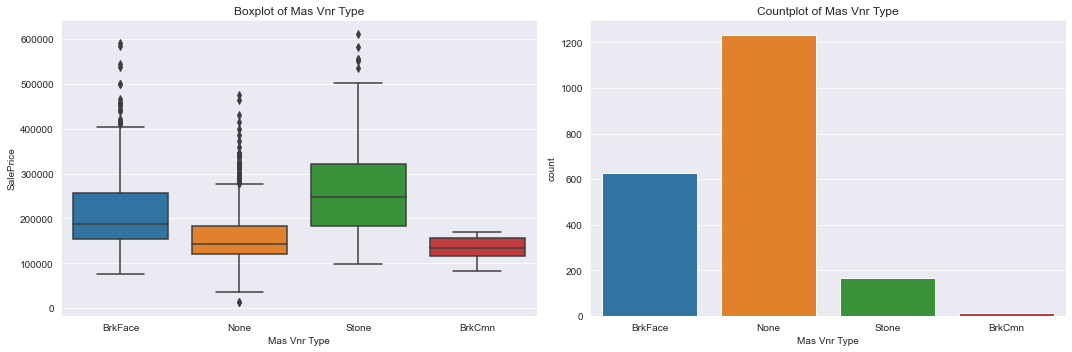

In [438]:
box_count_plotter('Mas Vnr Type',0)

In [439]:
norm_dict['Mas Vnr Type']

['BrkFace', 'None', 'Stone', 'BrkCmn']

In [440]:
# simplify and combine brick related categories:
train['Mas Vnr Type']=train['Mas Vnr Type'].map({'BrkFace':'Brk', 'None':'None', 'Stone':'Stone', 'BrkCmn':'Brk'})

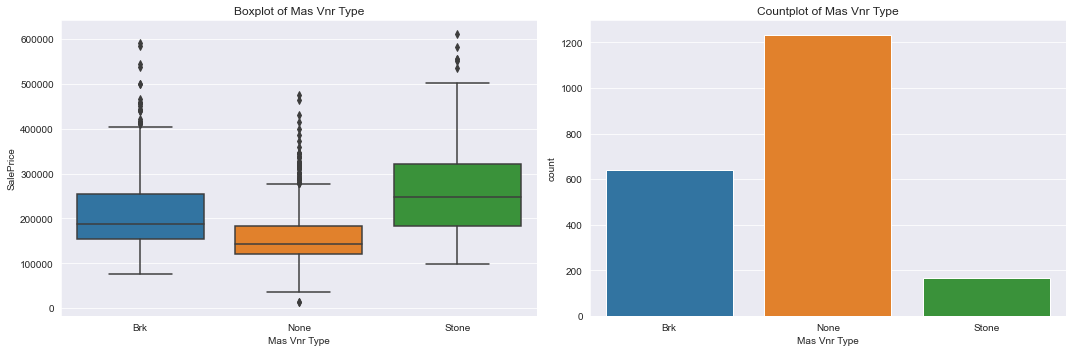

In [441]:
box_count_plotter('Mas Vnr Type',0)

Foundation:
- Simplify this. only PConc shows significant difference from the rest of categories. 
- Therefore, we will separate them again into PConc or not PConc

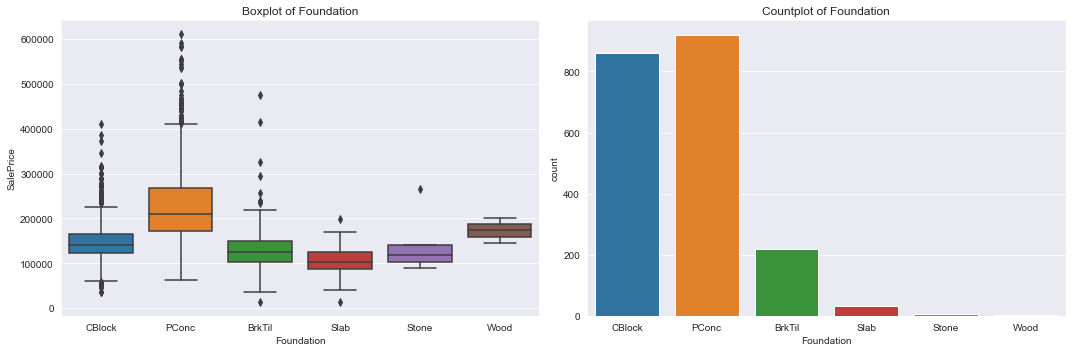

In [442]:
box_count_plotter('Foundation',0)

In [443]:
train['Foundation']=train['Foundation'].map({'CBlock':'not PConc', 'PConc':'PConc', 'BrkTil':'not PConc', 
                                             'Slab':'not PConc', 'Stone':'not PConc', 'Wood':'not PConc'})

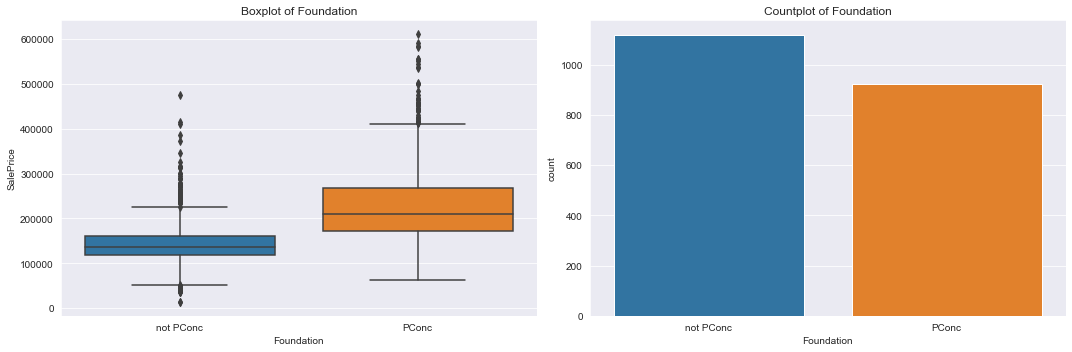

In [444]:
box_count_plotter('Foundation',0)

Garage type:
- Based on price range, map attached and builtin garage to be att_builtin and rest to be others and no garage gets none. 

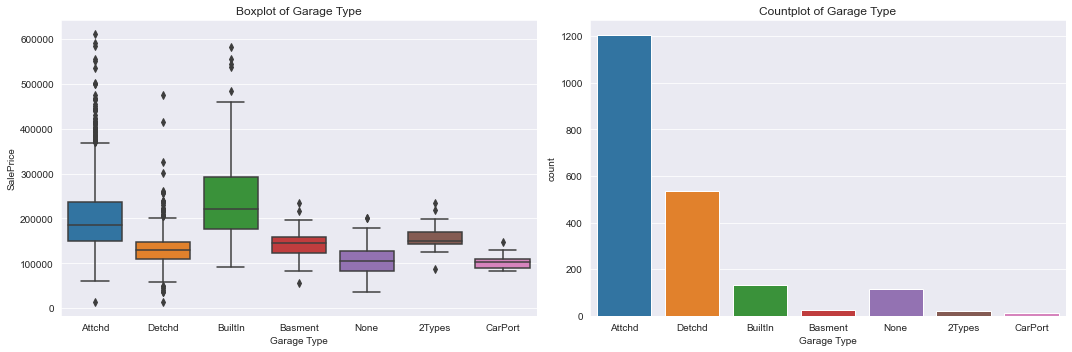

In [445]:
box_count_plotter('Garage Type',0)

In [446]:
train['Garage Type']=train['Garage Type'].map({'Attchd':'att_builtin', 'Detchd':'others', 'BuiltIn':'att_builtin', 'Basment':'others', 
                                               'None':'None', '2Types':'others', 'CarPort':'others'})

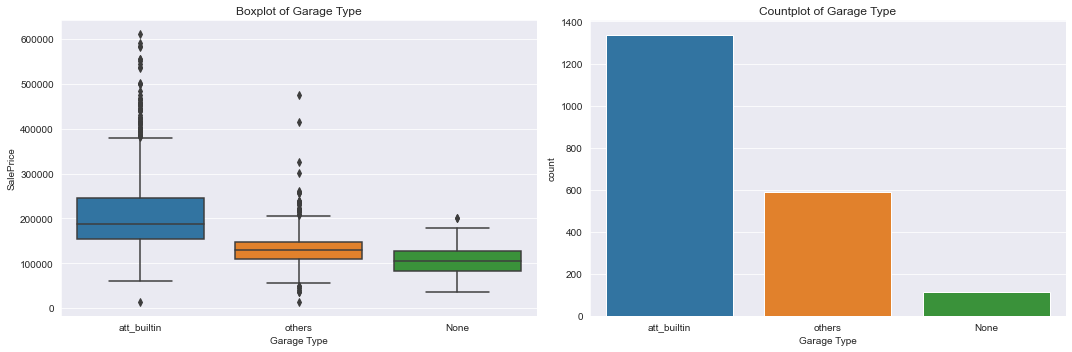

In [447]:
box_count_plotter('Garage Type',0)

Roof Style:
- Notice that price variation is not much between different types of roof styles and majority of roof has style gable. Therefore, we will drop this variable.

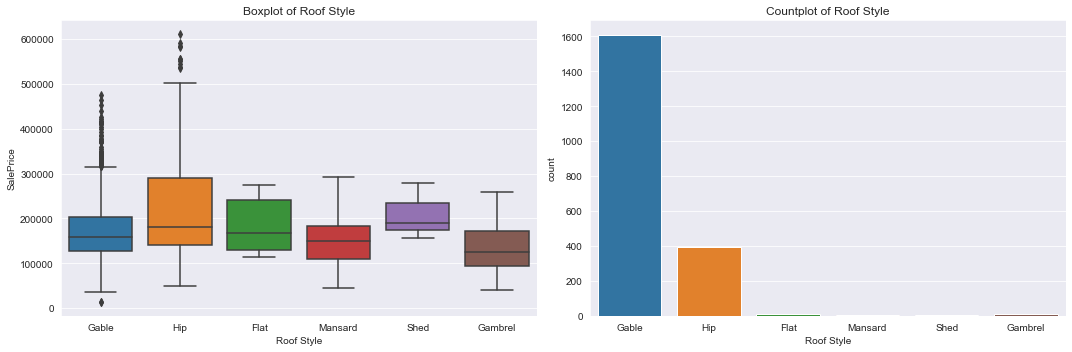

In [448]:
box_count_plotter('Roof Style',0)

In [449]:
cat_norm_var.remove('Roof Style')

In [450]:
cat_norm_var

['MS Zoning',
 'Lot Config',
 'Neighborhood',
 'Mas Vnr Type',
 'Foundation',
 'Garage Type',
 'MS SubClass']

## 4. Round 2 Feature Selection

In [451]:
Shortlist_numfeat_r2 = discrete_var+continous_var

In [452]:
Shortlist_numfeat_r2.append('SalePrice')

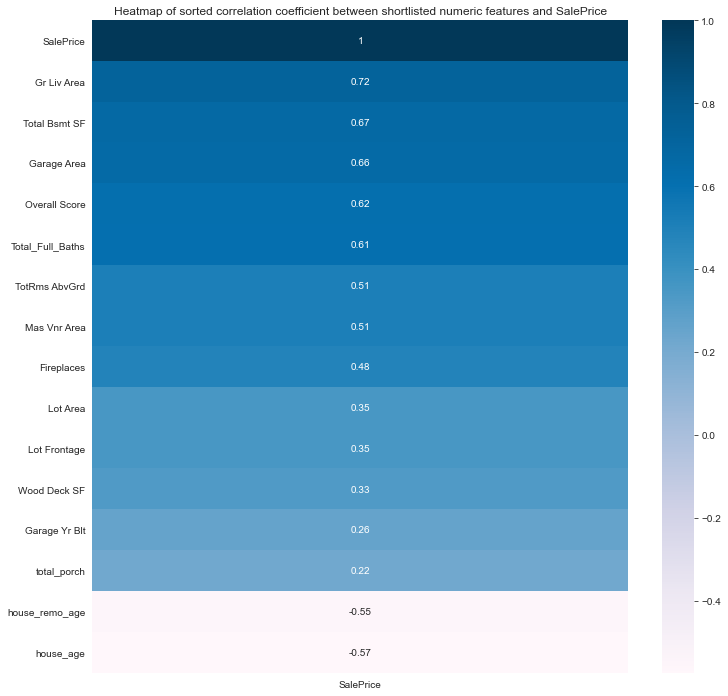

In [453]:
corr = train[Shortlist_numfeat_r2].corr()['SalePrice'].sort_values(ascending=False)
corr = pd.DataFrame(corr)
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='PuBu', annot=True);
plt.title('Heatmap of sorted correlation coefficient between shortlisted numeric features and SalePrice');

Dropping variables with less than 0.3 correlation coefficient with SalePrice

In [454]:
to_drop = ['total_porch','Garage Yr Blt']
Shortlist_numfeat_r2 = [var for var in Shortlist_numfeat_r2 if var not in to_drop]

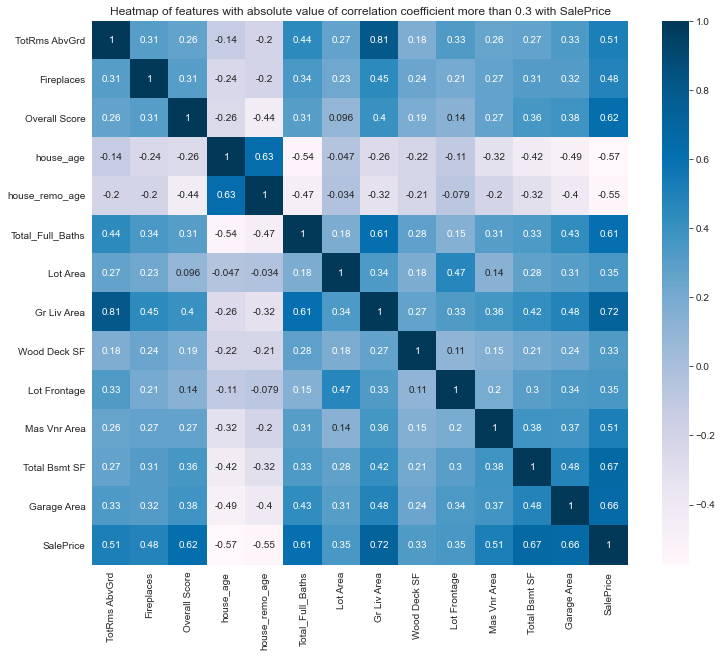

In [455]:
plt.figure(figsize=(12,10))
sns.heatmap(train[Shortlist_numfeat_r2].corr(), cmap='PuBu', annot=True);
plt.title('Heatmap of features with absolute value of correlation coefficient more than 0.3 with SalePrice');

Notice the following pairs of variable has high correlationship:
- above grade ground living area has a strong positive linear relationship with total rooms above grade. we will remove total room above grade since it has lower correlationship with SalePrice.

In [456]:
Shortlist_numfeat_r2.remove('TotRms AbvGrd')

In [457]:
categorical_var = cat_norm_var+cat_ord_var
final_var = categorical_var+Shortlist_numfeat_r2

In [458]:
len(final_var)

28

In [459]:
nominal_df = pd.get_dummies(train[categorical_var], drop_first=True)

In [460]:
final = pd.concat([train[Shortlist_numfeat_r2], nominal_df], axis=1)

In [461]:
final.shape

(2041, 58)

In [462]:
final.to_csv('Final Cleaned Training Data', index=False)

In [463]:
final.dtypes

Fireplaces                   int64
Overall Score                int64
house_age                    int64
house_remo_age               int64
Total_Full_Baths           float64
Lot Area                     int64
Gr Liv Area                  int64
Wood Deck SF                 int64
Lot Frontage               float64
Mas Vnr Area               float64
Total Bsmt SF              float64
Garage Area                float64
SalePrice                    int64
MS Zoning_C (all)            uint8
MS Zoning_FV                 uint8
MS Zoning_I (all)            uint8
MS Zoning_RH                 uint8
MS Zoning_RL                 uint8
MS Zoning_RM                 uint8
Lot Config_CulDSac           uint8
Lot Config_FR                uint8
Lot Config_Inside            uint8
Neighborhood_normal          uint8
Mas Vnr Type_None            uint8
Mas Vnr Type_Stone           uint8
Foundation_not PConc         uint8
Garage Type_att_builtin      uint8
Garage Type_others           uint8
MS SubClass_expensiv

In [464]:
final.columns

Index(['Fireplaces', 'Overall Score', 'house_age', 'house_remo_age',
       'Total_Full_Baths', 'Lot Area', 'Gr Liv Area', 'Wood Deck SF',
       'Lot Frontage', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area',
       'SalePrice', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Lot Config_CulDSac',
       'Lot Config_FR', 'Lot Config_Inside', 'Neighborhood_normal',
       'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Foundation_not PConc',
       'Garage Type_att_builtin', 'Garage Type_others',
       'MS SubClass_expensive', 'Lot Shape_Reg', 'Exter Qual_Fa',
       'Exter Qual_Gd', 'Exter Qual_TA', 'Bsmt Qual_Fa', 'Bsmt Qual_Gd',
       'Bsmt Qual_NoBsmt', 'Bsmt Qual_Po', 'Bsmt Qual_TA', 'Bsmt Exposure_Gd',
       'Bsmt Exposure_Mn', 'Bsmt Exposure_No', 'Bsmt Exposure_NoBsmt',
       'BsmtFin Type 1_BLQ', 'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_LwQ',
       'BsmtFin Type 1_NoBsmt', 'BsmtFin Type 1_Rec', 'BsmtFin Type 1_Unf',

In [465]:
for var in cat_norm_var:
    print(f'{var}:{train[var].unique()}')

MS Zoning:['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Lot Config:['CulDSac' 'Inside' 'Corner' 'FR']
Neighborhood:['normal' 'elite']
Mas Vnr Type:['Brk' 'None' 'Stone']
Foundation:['not PConc' 'PConc']
Garage Type:['att_builtin' 'others' 'None']
MS SubClass:['expensive' 'cheap']


In [466]:
for var in cat_ord_var:
    print(f'{var}:{train[var].unique()}')

Lot Shape:['IR' 'Reg']
Exter Qual:['Gd' 'TA' 'Ex' 'Fa']
Bsmt Qual:['TA' 'Gd' 'Fa' 'NoBsmt' 'Ex' 'Po']
Bsmt Exposure:['No' 'Gd' 'Av' 'NoBsmt' 'Mn']
BsmtFin Type 1:['GLQ' 'Unf' 'ALQ' 'Rec' 'NoBsmt' 'BLQ' 'LwQ']
Heating QC:['Ex' 'TA' 'Gd' 'Fa' 'Po']
Kitchen Qual:['Gd' 'TA' 'Fa' 'Ex']
Garage Finish:['RFn' 'Unf' 'Fin' 'None']


Get the reference categories which are dropped during get dummies. 

In [467]:
cat_var = cat_norm_var+cat_ord_var
reference={}
for var in cat_var:
    vals = list(train[var].unique())
    for i in vals:
        if var+'_'+i not in final.columns:
            reference[var] = i
reference

{'MS Zoning': 'A (agr)',
 'Lot Config': 'Corner',
 'Neighborhood': 'elite',
 'Mas Vnr Type': 'Brk',
 'Foundation': 'PConc',
 'Garage Type': 'None',
 'MS SubClass': 'cheap',
 'Lot Shape': 'IR',
 'Exter Qual': 'Ex',
 'Bsmt Qual': 'Ex',
 'Bsmt Exposure': 'Av',
 'BsmtFin Type 1': 'ALQ',
 'Heating QC': 'Ex',
 'Kitchen Qual': 'Ex',
 'Garage Finish': 'Fin'}

## 5. Data Modeling

In [468]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

In [469]:
features = list(final.columns)
features.remove('SalePrice')

In [470]:
X = final[features]
y = final['SalePrice']

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [472]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [473]:
def model_report(model, X_train, y_train, X_test, y_test, y_predictions, coeffs):
    p = np.sum(coeffs != 0)
    n = len(X_train)
    
    print(f"r2 score: {model.score(X_test, y_test)}")
    print(f"adjusted r2 score: {1-(1-(model.score(X_test, y_test)))*(n-1)/(n-p-1)}")
    print(f"cross_val_score: {cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()}")
    print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_predictions))}")

### 5.1 Linear Regression

In [474]:
linear_model = LinearRegression()

In [475]:
linear_model = linear_model.fit(X_train, y_train)

In [476]:
linear_predictions = linear_model.predict(X_test)

In [477]:
linear_coeffs = linear_model.coef_

In [478]:
model_report(linear_model, X_train, y_train, X_test, y_test, linear_predictions, linear_coeffs)

r2 score: -9.751722053215284e+17
adjusted r2 score: -1.0157450634991395e+18
cross_val_score: -35467110858.841194
RMSE: 82329890488827.97


>- Looking at the r2 score, our model is much worse than the baseline model, which is purely taking the average of saleprice as the predicted saleprice. <br>
- RMSE also suggested that there is significant overfitting in the model due to the complexity of model itself. 

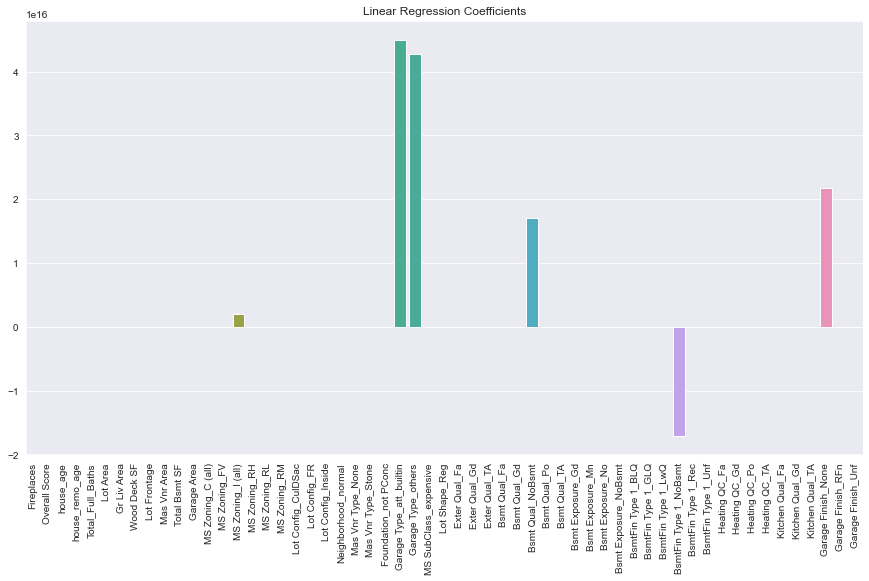

In [479]:
plt.figure(figsize=(15,8));
sns.barplot(x=list(X.columns), y=linear_coeffs);
plt.xticks(rotation = 'vertical')
plt.title('Linear Regression Coefficients');

>From coefficients of Linear Regression model we can tell that without regularization, model does not penalize the large coefficients. As such, effect of other coefficients are not impactful on the overall result. In addition, there are too many predictors in the model, some are relevant and some are not. This will lead to low varince in the model but result in high bias at the same time. Therefore, these two reason are the explanation for huge Root Mean Squared Error of Linear Regression Model. 

Re-run Linear Model with less featuers. 

In [480]:
linear_coeffs = pd.DataFrame(data=linear_coeffs, index=X.columns, columns=['Linear Coefficient'])

In [481]:
top15 = list(linear_coeffs.sort_values(by='Linear Coefficient').head(15).index)

In [482]:
bottom10 = list(linear_coeffs.sort_values(by='Linear Coefficient').tail(10).index)

In [483]:
X_linear = final[top15+bottom10]
y = final['SalePrice']

In [484]:
X_train_linear, X_test_linear, y_train, y_test = train_test_split(X_linear, y, test_size=0.3, random_state=42)

In [485]:
ss = StandardScaler()
X_train_linear = ss.fit_transform(X_train_linear)
X_test_llinear = ss.transform(X_test_linear)

In [486]:
linear = linear_model.fit(X_train_linear, y_train)

In [487]:
linear_predictions = linear.predict(X_test_linear)

In [488]:
linear_coeffs = linear.coef_

In [489]:
model_report(linear, X_train_linear, y_train, X_test_linear, y_test, linear_predictions, linear_coeffs)

r2 score: -1.4020217619266455e+24
adjusted r2 score: -1.4270221499781192e+24
cross_val_score: 0.8773518375116549
RMSE: 9.87175248883813e+16


> After reducing number of features, it is observed that there is significant improvement in both r2 score and RMSE. r2 score improved by 716 million times better and RMSE improved by close to 30 thousand times better. This is because by reducing number of features, our model is less complex and more generalized as compared to before. However, Linear Model is still not a good choice given the number of features we have in this dataset. 

### 5.2 LassoCV and Lasso

### 5.2.1 LassoCV

In [490]:
l_alphas = np.arange(10, 200, 0.1)
lassocv = LassoCV(alphas=l_alphas,cv=5)
lassocv = lassocv.fit(X_train, y_train)

In [491]:
lasso_optimal_alpha = lassocv.alpha_
lasso_optimal_alpha

90.99999999999972

In [492]:
lasso = Lasso(alpha=lasso_optimal_alpha)

In [493]:
lasso = lasso.fit(X_train, y_train)

In [494]:
lasso_predictions = lasso.predict(X_test)

In [495]:
lasso_coeffs = lasso.coef_

In [496]:
model_report(lasso, X_train, y_train, X_test, y_test, lasso_predictions, lasso_coeffs)

r2 score: 0.9099895074391032
adjusted r2 score: 0.9065174869836975
cross_val_score: 0.8969450548414416
RMSE: 25012.865607897074


>- Looking at r2 score and RMSE, it is performing much better than linear regression model. <br>
- This is due to the reason that Lasso model adds a penalty term in its regression model to penalize the large coefficents and preventing model to be overfit.<br>
- Cross validation score is slightly worse than r2 score but not by much which means our model is doing good on unseen data. 

In [497]:
lasso_coeff = {X.columns[i]: lasso_coeffs[i] for i in range(0, len(X.columns))}

In [498]:
lasso_coeff = pd.DataFrame.from_dict(lasso_coeff, orient='index', columns=['Lasso Coefficient'])

In [499]:
lasso_coeff.sort_values(by='Lasso Coefficient', ascending=False)

,Lasso Coefficient
Gr Liv Area,21771.400
Total Bsmt SF,12490.700
Overall Score,11879.025
Mas Vnr Area,5823.081
Garage Area,5574.468
Bsmt Exposure_Gd,4721.950
Mas Vnr Type_None,4210.580
Fireplaces,3913.570
Lot Area,3616.476
Mas Vnr Type_Stone,2940.284


> out of 57 features, Lasso selected 53 of them. From the rest of the non-zero coefficient, features with top 15 positive coefficient and bottom 10 negative coefficient will be selected to use in our final model. 

In [500]:
top15 = list(lasso_coeff.sort_values(by='Lasso Coefficient', ascending=False).head(15).index)

In [501]:
bottom10 = list(lasso_coeff.sort_values(by='Lasso Coefficient', ascending=False).tail(10).index)

In [502]:
final25 = top15+bottom10

### 5.2.2 Lasso

In [503]:
X_lasso = final[final25]
y = final['SalePrice']

In [504]:
X_train_lasso, X_test_lasso, y_train, y_test = train_test_split(X_lasso, y, test_size=0.3, random_state=42)

In [505]:
ss = StandardScaler()
X_train_lasso = ss.fit_transform(X_train_lasso)
X_test_lasso = ss.transform(X_test_lasso)

In [506]:
lasso = lasso.fit(X_train_lasso, y_train)

In [507]:
lasso_predictions = lasso.predict(X_test_lasso)

In [508]:
lasso_coeffs = lasso.coef_

In [509]:
model_report(lasso, X_train_lasso, y_train, X_test_lasso, y_test, lasso_predictions, lasso_coeffs)

r2 score: 0.9040790356007342
adjusted r2 score: 0.9023686047091639
cross_val_score: 0.8940060099508734
RMSE: 25821.035145993723


>- As compare to previous Lasso model with 57 features, Lasso model with top 25 features performed slightly worse. This is observed by the marginal increase in RMSE. Though it increased by 800 dollars, however, on the saleprice scale which is in 100 of thousands, this increase is negligible. 

In [510]:
lasso_coeff = {X_lasso.columns[i]: lasso_coeffs[i] for i in range(0, len(X_lasso.columns))}

In [511]:
lasso_coeff = pd.DataFrame.from_dict(lasso_coeff, orient='index', columns=['Lasso Coefficient'])

In [512]:
lasso_coeff = lasso_coeff.sort_values(by='Lasso Coefficient', ascending=False)
lasso_coeff['Lasso abs Coefficient'] = np.abs(lasso_coeff['Lasso Coefficient'])
lasso_coeff['ptv/ngtv'] = lasso_coeff['Lasso Coefficient'].apply(lambda x: 'positive' if x>0 else 'negative')
lasso_coeff

,Lasso Coefficient,Lasso abs Coefficient,ptv/ngtv
Gr Liv Area,20826.976,20826.976,positive
Total Bsmt SF,13425.654,13425.654,positive
Overall Score,12998.436,12998.436,positive
Bsmt Exposure_Gd,6014.804,6014.804,positive
Mas Vnr Area,5588.414,5588.414,positive
Garage Area,5526.705,5526.705,positive
Fireplaces,5125.026,5125.026,positive
BsmtFin Type 1_GLQ,4516.873,4516.873,positive
Lot Area,4358.268,4358.268,positive
Mas Vnr Type_None,3587.480,3587.480,positive


> Interpretation of coefficients:
- coefficients of the categorical features represents the increase/decrease in saleprice given unit change in the given category as compared to the reference category which was dropping while getting dummy. 
- coefficients of the numeric features represents the incease/decrease in saleprice given unit change in itself. 
- the negative coefficients:
    - numeric features: these are the features which we should avoid because they directly decrease saleprice. 
    - categorical features: these are relative changes as compared to the reference category. Therefore, these categories are the ones we should avoid and choose the reference category instead. 

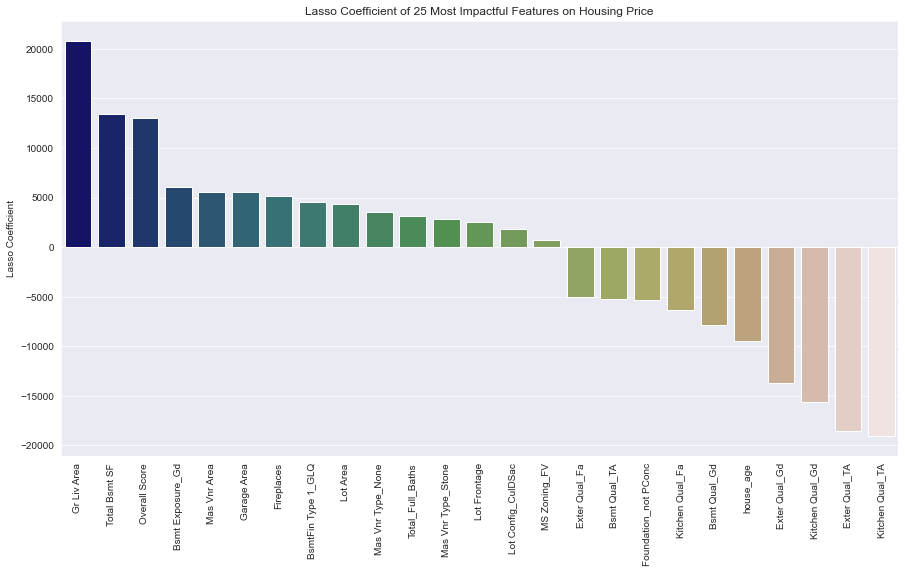

In [513]:
plt.figure(figsize=(15,8))
sns.barplot(x=lasso_coeff.index, y=lasso_coeff['Lasso Coefficient'], orient='v', palette='gist_earth');
plt.xticks(rotation='vertical');
plt.title('Lasso Coefficient of 25 Most Impactful Features on Housing Price');

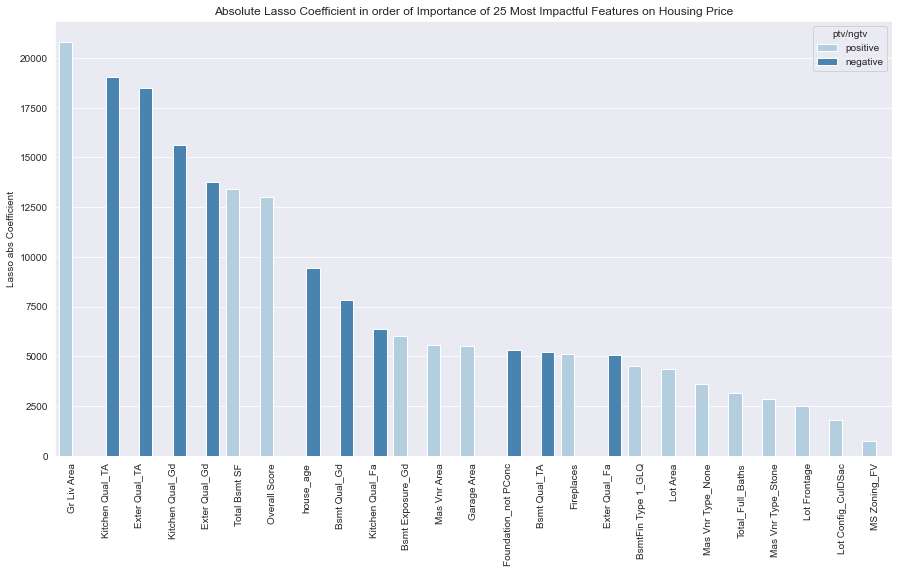

In [514]:
order = list(lasso_coeff.sort_values(by='Lasso abs Coefficient', ascending=False).index)
plt.figure(figsize=(15,8))
sns.barplot(x=lasso_coeff.index, y=lasso_coeff['Lasso abs Coefficient'], data = lasso_coeff, 
            order=order,orient='v', palette='Blues', hue='ptv/ngtv');
plt.xticks(rotation='vertical');
plt.title('Absolute Lasso Coefficient in order of Importance of 25 Most Impactful Features on Housing Price');

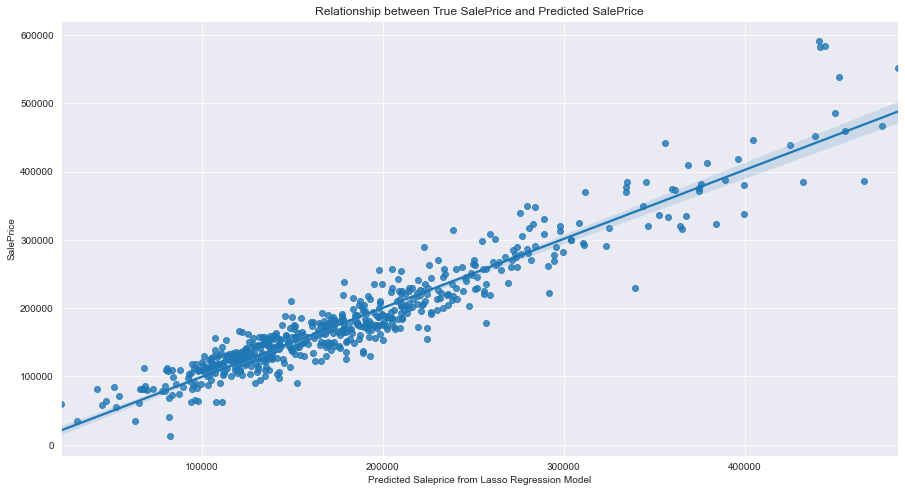

In [515]:
plt.figure(figsize=(15,8));
sns.regplot(x=lasso_predictions, y=y_test);
plt.title('Relationship between True SalePrice and Predicted SalePrice');
plt.xlabel('Predicted Saleprice from Lasso Regression Model');

> It is observed that predicted saleprice and true saleprice has a strong linear correlationship with slope close to 1. This indicates that our model is very accurate in predicting the true price. For SalePrice above 400000, the points are slightly more scattered as compared to saleprice less than 400000, this could be due to the reason that there are more houses with less than 400K saleprice for us to train in our training model and therefore, prediction for houses with saleprice less than 400K is more accurate than houses worth above 400K. 

### 5.3. RidgeCV and Ridge

### 5.3.1 RidgeCV

In [516]:
alphas = np.arange(0.01, 1.5, 0.025)
Ridgecv = RidgeCV(alphas=alphas, store_cv_values=True)
Ridgecv = Ridgecv.fit(X_train, y_train)

In [517]:
ridge_optimal_alpha = Ridgecv.alpha_
ridge_optimal_alpha

0.21000000000000002

In [518]:
ridge = Ridge(alpha=ridge_optimal_alpha)

In [519]:
ridge = ridge.fit(X_train, y_train)

In [520]:
ridge_predictions = ridge.predict(X_test)

In [521]:
ridge_coeffs = Ridgecv.coef_

In [522]:
model_report(ridge, X_train, y_train, X_test, y_test, ridge_predictions, ridge_coeffs)

r2 score: 0.9094584934524309
adjusted r2 score: 0.9057602262265637
cross_val_score: 0.8969356655895906
RMSE: 25086.53840552756


>- Compare to Linear Regression model, Ridge Regression is performing much better. Similar to Lasso Regression, Ridge Regression also adds a penalty term to prevent overfitting. Hence, it explains the improved performance from Linear Regression Model. <br>
- Compare with Lasso Regression model, Ridge Regression model is performing marginally worse. r2 score is lower by 0.0005 and 60 dollars more in RMSE. However, on the scale of saleprice which is in hundreds of thousands, this is negligible and performance is still good. 

In [523]:
ridge_coeff = {X.columns[i]: ridge_coeffs[i] for i in range(0, len(X.columns))}

In [524]:
ridge_coeff = pd.DataFrame.from_dict(ridge_coeff, orient='index', columns=['Ridge Coefficient'])

In [525]:
ridge_coeff.sort_values(by='Ridge Coefficient', ascending=False)

,Ridge Coefficient
Gr Liv Area,21817.823
MS Zoning_RL,13800.584
Total Bsmt SF,12227.635
Overall Score,11558.972
MS Zoning_RM,10751.736
MS Zoning_FV,8351.878
Mas Vnr Area,5938.662
Garage Area,5449.886
Bsmt Exposure_Gd,4624.581
Mas Vnr Type_None,4534.626


> - Out of 57 features, Ridge Regression selected 56 of them. From the rest of non-zero coefficients, features with top 15 positive coefficient and bottom 10 negative coefficients will be selected to use in our final model. 

In [526]:
top15 = list(ridge_coeff.sort_values(by='Ridge Coefficient', ascending=False).head(15).index)

In [527]:
bottom10 = list(ridge_coeff.sort_values(by='Ridge Coefficient', ascending=False).tail(10).index)

In [528]:
final25 = top15+bottom10

### 5.3.2 Ridge

In [529]:
X_ridge = final[final25]
y = final['SalePrice']

In [530]:
X_train_ridge, X_test_ridge, y_train, y_test = train_test_split(X_ridge, y, test_size=0.3, random_state=42)

In [531]:
ss = StandardScaler()
X_train_ridge = ss.fit_transform(X_train_ridge)
X_test_ridge = ss.transform(X_test_ridge)

In [532]:
ridge = Ridge(alpha=ridge_optimal_alpha)
ridge = ridge.fit(X_train_ridge, y_train)

In [533]:
ridge_predictions = ridge.predict(X_test_ridge)

In [534]:
ridge_coeffs = ridge.coef_

In [535]:
model_report(ridge, X_train_ridge, y_train, X_test_ridge, y_test, ridge_predictions, ridge_coeffs)

r2 score: 0.9032729215454088
adjusted r2 score: 0.901548116294792
cross_val_score: 0.8904645642458545
RMSE: 25929.30736213638


>- Looking at r2 score and RMSE, new ridge model with 25 features performed marginally worse than previous model with 57 features. However, differences in scores are not siginificant at all. Therefore, overall we can still say that ridge model with only 25 features performed well and it is more efficient than the previous model. 

In [536]:
ridge_coeff = {X_ridge.columns[i]: ridge_coeffs[i] for i in range (0, len(X_ridge.columns))}

In [537]:
ridge_coeff = pd.DataFrame.from_dict(ridge_coeff, orient='index', columns=['Ridge Coefficient'])

In [538]:
ridge_coeff = ridge_coeff.sort_values(by='Ridge Coefficient', ascending=False)
ridge_coeff['Ridge abs Coefficient'] = np.abs(ridge_coeff['Ridge Coefficient'])
ridge_coeff['ptv/ngtv'] = ridge_coeff['Ridge Coefficient'].apply(lambda x: 'positive' if x>0 else 'negative')
ridge_coeff

,Ridge Coefficient,Ridge abs Coefficient,ptv/ngtv
Gr Liv Area,22511.997,22511.997,positive
MS Zoning_RL,16085.537,16085.537,positive
Total Bsmt SF,13287.708,13287.708,positive
Overall Score,12923.722,12923.722,positive
MS Zoning_RM,12194.914,12194.914,positive
MS Zoning_FV,9646.529,9646.529,positive
Bsmt Exposure_Gd,7071.543,7071.543,positive
Mas Vnr Area,6016.508,6016.508,positive
Garage Area,5937.198,5937.198,positive
Lot Area,5261.475,5261.475,positive


In [539]:
reference

{'MS Zoning': 'A (agr)',
 'Lot Config': 'Corner',
 'Neighborhood': 'elite',
 'Mas Vnr Type': 'Brk',
 'Foundation': 'PConc',
 'Garage Type': 'None',
 'MS SubClass': 'cheap',
 'Lot Shape': 'IR',
 'Exter Qual': 'Ex',
 'Bsmt Qual': 'Ex',
 'Bsmt Exposure': 'Av',
 'BsmtFin Type 1': 'ALQ',
 'Heating QC': 'Ex',
 'Kitchen Qual': 'Ex',
 'Garage Finish': 'Fin'}

> Interpretation of coefficients:
- coefficients of the categorical features represents the increase/decrease in saleprice given unit change in the given category as compared to the reference category which was dropping while getting dummy. 
- coefficients of the numeric features represents the incease/decrease in saleprice given unit change in itself. 
- the negative coefficients:
    - numeric features: these are the features which we should avoid because they directly decrease saleprice. 
    - categorical features: these are relative changes as compared to the reference category. Therefore, these categories are the ones we should avoid and choose the reference category instead. 

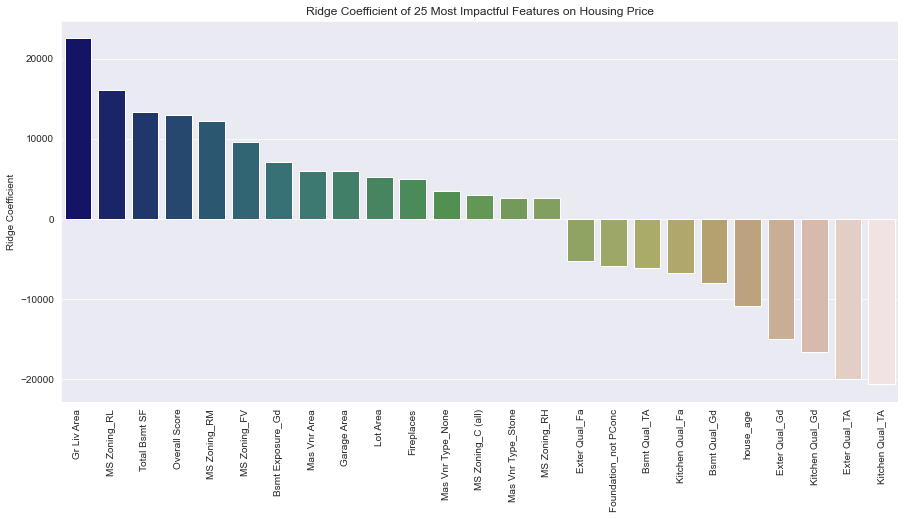

In [540]:
plt.figure(figsize=(15,7))
sns.barplot(x=ridge_coeff.index, y=ridge_coeff['Ridge Coefficient'], orient='v', palette='gist_earth');
plt.xticks(rotation='vertical');
plt.title('Ridge Coefficient of 25 Most Impactful Features on Housing Price');

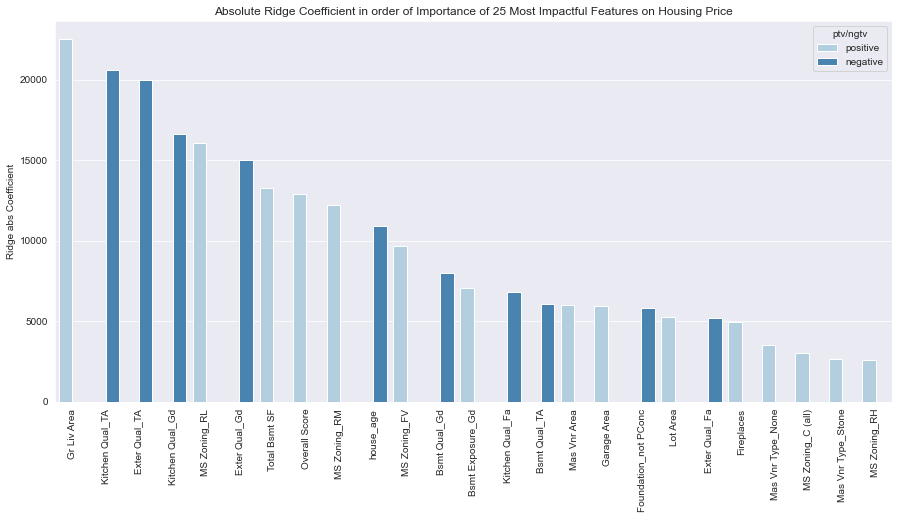

In [541]:
order = list(ridge_coeff.sort_values(by='Ridge abs Coefficient', ascending=False).index)
plt.figure(figsize=(15,7))
sns.barplot(x=ridge_coeff.index, y=ridge_coeff['Ridge abs Coefficient'], data = ridge_coeff, 
            order=order,orient='v', palette='Blues', hue='ptv/ngtv');
plt.xticks(rotation='vertical');
plt.title('Absolute Ridge Coefficient in order of Importance of 25 Most Impactful Features on Housing Price');

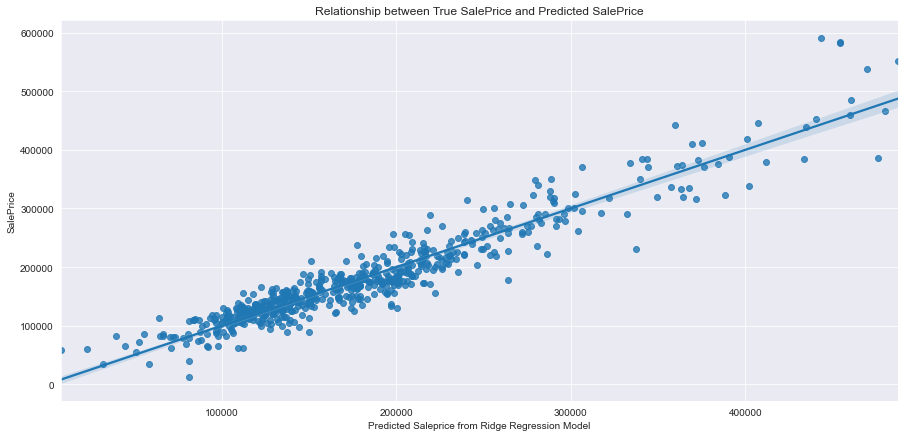

In [542]:
plt.figure(figsize=(15,7));
sns.regplot(x=ridge_predictions, y=y_test);
plt.title('Relationship between True SalePrice and Predicted SalePrice');
plt.xlabel('Predicted Saleprice from Ridge Regression Model');

>It is observed that predicted saleprice and true saleprice has a strong linear correlationship with slope close to 1. This indicates that our model is very accurate in predicting the true price. Similar to Lasso Regression, for SalePrice above 400000, the points are slightly more scattered as compared to saleprice less than 400000, this could be due to the reason that there are more houses with less than 400K saleprice for us to train in our training model and therefore, prediction for houses with saleprice less than 400K is more accurate than houses worth above 400K.

## 5.4 Comparison between Lasso and Ridge Regression

In [543]:
comparison = pd.concat([lasso_coeff, ridge_coeff], axis=1)
comparison

,Lasso Coefficient,Lasso abs Coefficient,ptv/ngtv,Ridge Coefficient,Ridge abs Coefficient,ptv/ngtv
Gr Liv Area,20826.976,20826.976,positive,22511.997,22511.997,positive
Total Bsmt SF,13425.654,13425.654,positive,13287.708,13287.708,positive
Overall Score,12998.436,12998.436,positive,12923.722,12923.722,positive
Bsmt Exposure_Gd,6014.804,6014.804,positive,7071.543,7071.543,positive
Mas Vnr Area,5588.414,5588.414,positive,6016.508,6016.508,positive
Garage Area,5526.705,5526.705,positive,5937.198,5937.198,positive
Fireplaces,5125.026,5125.026,positive,4961.448,4961.448,positive
BsmtFin Type 1_GLQ,4516.873,4516.873,positive,nan,nan,NaN
Lot Area,4358.268,4358.268,positive,5261.475,5261.475,positive
Mas Vnr Type_None,3587.480,3587.480,positive,3501.738,3501.738,positive


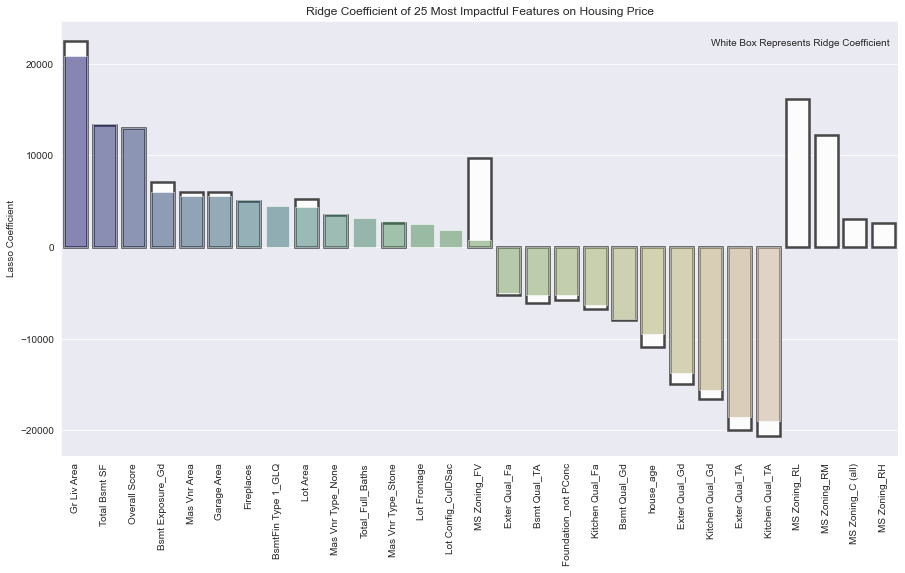

In [544]:
plt.figure(figsize=(15,8))
sns.barplot(x=comparison.index, y=comparison['Ridge Coefficient'], alpha=0.9,
           linewidth=2.5, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2");
sns.barplot(x=comparison.index, y=comparison['Lasso Coefficient'], palette='gist_earth', alpha=0.5);
plt.xticks(rotation='vertical');
plt.title('Ridge Coefficient of 25 Most Impactful Features on Housing Price');
plt.annotate('White Box Represents Ridge Coefficient', xy=(22.0, 22000));

>From coefficient graph we can see that Ridge and Lasso selected similar features in their estimation. The difference between two models are:
- Lasso model did not select MS Zongning features and Ridge model did not select Basement finish type, total number of baths, lot frontage and lot config variables. 
- Compare to Ridge model, coefficients of Lasso model is generally smaller this coule be the reason that Lasso penalizes coefficients more than Ridge Model. 
- Despite the difference in feature selection, two models are able to perform caparably good. 

# 6. Conclusion

After thorough analysis of the avaiable data, both models helped us identify 25 most impactful features according to their analysis but they differ by 8 features. Two models we have gave us difference selection of features. Though two models both give us the correct selection, however, from a real estate company point of view, we focus more on the bigger picture such as location of the house rather than which type of finish the basement uses. Therefore, my recommendation to stakeholders are based on Ridge Regression model. <br>

Some recommendations to boost saleprice:
- we want to increase size and number of the following attibutes:
    - Ground living area, basement, Mas Veneer Area, garage, lot area, fireplaces. 
- we want to develop/invest houses in the following area:
    - medium residential density area, floating village area, high residential density area, commercial area
- we want better quality in the following attributes:
    - overall condition/quality, basement exposure, exterior condition/quality, use PCone for house foundation, kitchen quality
- we want to invest in newer houses rather than the old ones.

It is proven from our model that by implementing the aboved suggestions, average saleprice will increase. 

In future predictions, we could gather more data and conduct survey with houseowners to better understand the market. 

# Appendix. Kaggle Challenge

## 1. Import and Clean Data

In [545]:
test_df = pd.read_csv('../01 Data/test.csv')

In [546]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.000,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.000,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,nan,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.000,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.000,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.000,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,nan,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.000,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.000,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [547]:
test_df.isnull().sum()[test_df.isnull().sum()>0].sort_values(ascending=False)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
dtype: int64

In [548]:
test_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)

In [549]:
test_df['Lot Frontage'] = test_df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [550]:
test_df.isnull().sum()[test_df.isnull().sum()>0].sort_values(ascending=False)

Garage Cond       45
Garage Qual       45
Garage Finish     45
Garage Yr Blt     45
Garage Type       44
BsmtFin Type 2    25
BsmtFin Type 1    25
Bsmt Exposure     25
Bsmt Cond         25
Bsmt Qual         25
Electrical         1
Mas Vnr Area       1
Mas Vnr Type       1
dtype: int64

In [551]:
test_df['Garage Yr Blt']=test_df['Garage Yr Blt'].fillna(0)
test_df['Garage Finish']=test_df['Garage Finish'].fillna('None')
test_df['Garage Qual']=test_df['Garage Qual'].fillna('None')
test_df['Garage Cond']=test_df['Garage Cond'].fillna('None')
test_df['Garage Type']=test_df['Garage Type'].fillna('None')

In [552]:
list1 = ['Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','Mas Vnr Type']

In [553]:
for i in list1:
    print('{} : {}'.format(i, test_df[i].unique()))

Bsmt Exposure : ['No' 'Av' nan 'Mn' 'Gd']
BsmtFin Type 2 : ['Unf' 'LwQ' nan 'ALQ' 'GLQ' 'Rec' 'BLQ']
Bsmt Cond : ['TA' 'Gd' nan 'Fa']
Bsmt Qual : ['Fa' 'Gd' 'TA' 'Ex' nan 'Po']
BsmtFin Type 1 : ['Unf' 'GLQ' 'BLQ' 'Rec' 'ALQ' nan 'LwQ']
Mas Vnr Type : ['None' 'BrkFace' 'Stone' 'BrkCmn' 'CBlock' nan]


In [554]:
test_df['Bsmt Exposure']=test_df['Bsmt Exposure'].fillna('NoBsmt')
test_df['BsmtFin Type 2']=test_df['BsmtFin Type 2'].fillna('NoBsmt')
test_df['Bsmt Cond']=test_df['Bsmt Cond'].fillna('NoBsmt')
test_df['Bsmt Qual']=test_df['Bsmt Qual'].fillna('NoBsmt')
test_df['BsmtFin Type 1']=test_df['BsmtFin Type 1'].fillna('NoBsmt')
test_df['Mas Vnr Area']=test_df['Mas Vnr Area'].fillna(0)
test_df['Mas Vnr Type']=test_df['Mas Vnr Type'].fillna('None')

In [555]:
test_df.isnull().sum()[test_df.isnull().sum()>0]

Electrical    1
dtype: int64

In [556]:
test_df[test_df['Electrical'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,73.000,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,BuiltIn,2007.000,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD


In [557]:
test_df['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [558]:
test_df.loc[test_df['Id']==1578, 'Electrical']='SBrkr'

In [559]:
test_df.isnull().sum()[test_df.isnull().sum()>0]

Series([], dtype: int64)

## 2. Feature Engineering

In [560]:
discrete_var = ['MS SubClass','Overall Qual','Overall Cond','Year Built','Year Remod/Add','Full Bath',
                'Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd', 'Fireplaces','Mo Sold',
                'Yr Sold', 'Bsmt Full Bath', 'Bsmt Half Bath']
continous_var = ['Lot Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Wood Deck SF',
                 'Open Porch SF','Enclosed Porch', '3Ssn Porch', 'Screen Porch','Pool Area','Misc Val',
                 'Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 
                 'Total Bsmt SF','Garage Yr Blt', 'Garage Cars', 'Garage Area']
cat_ord_var = ['Lot Shape','Utilities','Land Slope','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
               'BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional',
               'Garage Finish','Garage Qual','Garage Cond','Paved Drive']
cat_norm_var = ['MS Zoning','Street','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2',
               'Bldg Type', 'House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type',
               'Foundation','Heating','Central Air','Garage Type','Sale Type']

## 2.1 Discrete Variable

In [561]:
test_df['MS SubClass'].unique()

array([190,  90,  60,  30,  20, 160, 120,  70,  80,  50,  85,  45,  75,
       180,  40])

In [562]:
test_df['MS SubClass'] = test_df['MS SubClass'].apply(lambda x: 'expensive' if x in [20, 60, 70, 75, 80, 85, 120] else 'cheap')

In [563]:
cat_norm_var.append('MS SubClass')
discrete_var.remove('MS SubClass')
cat_norm_var.remove('House Style')

In [564]:
test_df['Overall Qual'].unique()

array([ 6,  5,  7,  4,  8,  3, 10,  9,  2])

In [565]:
test_df['Overall Qual'] = test_df['Overall Qual'].map({1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:4, 10:5})

In [566]:
test_df['Overall Cond'].unique()

array([8, 4, 5, 6, 7, 9, 3, 2, 1])

In [567]:
test_df['Overall Cond'] = test_df['Overall Cond'].map({1:1, 2:1, 3:2, 4:2, 5:3, 6:4, 7:4, 8:4, 9:5})

In [568]:
test_df['Overall Score'] = test_df['Overall Qual']*test_df['Overall Cond']

In [569]:
discrete_var.append('Overall Score')
discrete_var.remove('Overall Qual')
discrete_var.remove('Overall Cond')

In [570]:
test_df['house_age'] = test_df['Yr Sold'] - test_df['Year Built']

In [571]:
test_df[test_df['house_age']<0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Overall Score,house_age


In [572]:
discrete_var.append('house_age')
discrete_var.remove('Year Built')

In [573]:
test_df['house_remo_age'] = test_df['Yr Sold'] - test_df['Year Remod/Add']

In [574]:
test_df[test_df['house_remo_age']<0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Overall Score,house_age,house_remo_age
76,2182,908154205,expensive,RL,130.000,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,5,3,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,BuiltIn,2007.000,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,15,0,-1


In [575]:
test_df.loc[test_df['Id']==2182, 'house_remo_age']=0

In [576]:
discrete_var.append('house_remo_age')
discrete_var.remove('Year Remod/Add')
discrete_var.remove('Yr Sold')

In [577]:
test_df['Total_Full_Baths'] = test_df['Full Bath']+test_df['Half Bath']+test_df['Bsmt Full Bath']+test_df['Bsmt Half Bath']

In [578]:
discrete_var.append('Total_Full_Baths')
list1 = ['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath']
discrete_var = [var for var in discrete_var if var not in list1]

In [579]:
discrete_var.remove('Kitchen AbvGr')
discrete_var.remove('Bedroom AbvGr')

In [580]:
test_df['Fireplaces'].unique()

array([0, 1, 2, 3])

In [581]:
test_df['Fireplaces'] = test_df['Fireplaces'].map({0:0, 1:1, 2:1, 4:1, 3:1})

In [582]:
discrete_var.remove('Mo Sold')

## 2.2 Continuous Variable

In [583]:
remove_area = ['1st Flr SF','2nd Flr SF','Low Qual Fin SF']
continous_var = [var for var in continous_var if var not in remove_area]

In [584]:
test_df['total_porch'] = test_df['Open Porch SF']+test_df['Enclosed Porch']+test_df['3Ssn Porch']+test_df['Screen Porch']

In [585]:
continous_var.append('total_porch')
porch_var = ['Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']
continous_var = [var for var in continous_var if var not in porch_var]

In [586]:
continous_var.remove('Garage Cars')

In [587]:
basmt_var = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF']
continous_var = [var for var in continous_var if var not in basmt_var]

In [588]:
misc_var_remove = ['Pool Area', 'Misc Val']
continous_var = [var for var in continous_var if var not in misc_var_remove]

## 2.3 Ordinal Categorical Variable

In [589]:
bias_list = ['Utilities','Land Slope','Exter Cond','Bsmt Cond','BsmtFin Type 2','Electrical',
             'Functional','Garage Qual','Garage Cond','Paved Drive']
cat_ord_var = [var for var in cat_ord_var if var not in bias_list]

In [590]:
test_df['Lot Shape'].unique()

array(['Reg', 'IR1', 'IR3', 'IR2'], dtype=object)

In [591]:
test_df['Lot Shape'] = test_df['Lot Shape'].map({'Reg':'Reg', 'IR1':'IR', 'IR2':'IR', 'IR3':'IR'})

## 2.4 Nominal Categorical Variable

In [592]:
bias_list2 = ['Street','Land Contour','Condition 1','Condition 2',
              'Bldg Type','Roof Matl','Heating','Central Air','Sale Type']
cat_norm_var = [var for var in cat_norm_var if var not in bias_list2]

In [593]:
test_df['Lot Config'].unique()

array(['Inside', 'CulDSac', 'Corner', 'FR2', 'FR3'], dtype=object)

In [594]:
test_df['Lot Config'] = test_df['Lot Config'].map({'CulDSac':'CulDSac', 'Inside':'Inside', 
                                               'Corner':'Corner', 'FR2':'FR', 'FR3':'FR'})

In [595]:
test_df['Neighborhood'].unique()

array(['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr',
       'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards',
       'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor',
       'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill',
       'Greens', 'Blueste'], dtype=object)

In [596]:
test_df['Neighborhood'] = test_df['Neighborhood'].map({'Sawyer':'normal','SawyerW':'elite','NAmes':'normal',
                                                   'Timber':'elite','Edwards':'normal','OldTown':'normal',
                                                   'BrDale':'normal','CollgCr':'elite','Somerst':'elite',
                                                   'Mitchel':'normal', 'StoneBr':'elite','NridgHt':'elite',
                                                   'Gilbert':'elite','Crawfor':'elite','IDOTRR':'normal', 
                                                   'NWAmes':'elite','Veenker':'elite','MeadowV':'normal',
                                                   'SWISU':'normal','NoRidge':'elite','ClearCr':'elite',
                                                   'Blmngtn':'elite','BrkSide':'normal','NPkVill':'normal',
                                                   'Blueste':'normal','Greens':'elite'})

In [597]:
cat_norm_var.remove('Exterior 1st')
cat_norm_var.remove('Exterior 2nd')

In [598]:
test_df['Mas Vnr Type'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock'], dtype=object)

In [599]:
test_df['Mas Vnr Type']=test_df['Mas Vnr Type'].map({'BrkFace':'Brk', 'None':'None', 'Stone':'Stone', 'BrkCmn':'Brk', 'CBlock':'CBlock'})

In [600]:
test_df['Foundation'].unique()

array(['Stone', 'CBlock', 'PConc', 'BrkTil', 'Slab', 'Wood'], dtype=object)

In [601]:
test_df['Foundation']=test_df['Foundation'].map({'CBlock':'not PConc', 'PConc':'PConc', 'BrkTil':'not PConc', 
                                             'Slab':'not PConc', 'Stone':'not PConc', 'Wood':'not PConc'})

In [602]:
test_df['Garage Type'].unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'None', '2Types', 'CarPort',
       'Basment'], dtype=object)

In [603]:
test_df['Garage Type']=test_df['Garage Type'].map({'Attchd':'att_builtin', 'Detchd':'others', 'BuiltIn':'att_builtin', 'Basment':'others', 
                                               'None':'None', '2Types':'others', 'CarPort':'others'})

In [604]:
cat_norm_var.remove('Roof Style')

## 3. Feature Selection

In [605]:
continous_var.remove('total_porch')
continous_var.remove('Garage Yr Blt')

In [606]:
discrete_var.remove('TotRms AbvGrd')

In [607]:
categorical_variables = cat_norm_var+cat_ord_var
numeric_variables = discrete_var+continous_var

In [608]:
categorical_df = pd.get_dummies(test_df[categorical_variables], drop_first=True)

In [609]:
test_final = pd.concat([test_df[numeric_variables], categorical_df], axis=1)

In [610]:
final_features = lasso_coeff.index

## 4. Predictions

In [611]:
X_test = test_final[final_features]

In [612]:
ss = StandardScaler()
X_test = ss.fit_transform(X_test)

In [613]:
test_predictions = lasso.predict(X_test)

In [614]:
test_predictions

array([158423.51488579, 180975.35926923, 213917.59515376, 120250.48018908,
       156818.37580973, 105162.64767523, 115142.81835986, 168080.33288982,
       204466.65077885, 159154.03446392, 182078.67741724, 110414.9101587 ,
       144564.00356147, 291386.00811375, 143846.0475721 , 130440.7086167 ,
       151680.94938697, 114439.79264756, 175536.22359171, 202749.38847692,
       138413.55145714, 134937.55473891, 211433.24062282, 168750.01752045,
       215263.97513637, 110684.00949334, 118566.7901249 , 160357.91329266,
       180846.41485832,  39448.11072277, 120887.33104223, 102007.25544886,
       236474.58375053, 158002.83998113, 235207.02686201, 178328.82448816,
       156219.15986627,  86556.20151482, 102357.31304939, 209097.93730886,
       166440.95924304, 219761.50860673, 150164.02514862, 149300.48785704,
       231501.74055512, 114002.03148176, 234634.39730866, 102774.68095115,
       113954.74052519, 115731.73936768, 100333.43241792, 210348.87535582,
       248074.91429941, 1

In [615]:
Submission = pd.DataFrame(test_df['Id'], columns=['Id'])

In [616]:
Submission['SalePrice'] = test_predictions

In [617]:
Submission

,Id,SalePrice
0,2658,158423.515
1,2718,180975.359
2,2414,213917.595
3,1989,120250.480
4,625,156818.376
...,...,...
874,1662,182408.395
875,1234,206898.250
876,1373,121138.197
877,1672,135492.872


In [618]:
Submission.to_csv('Housing Price Prediction Final', index=False)